This is just an extention of the order segmentation notebook, except here each data point is a customer now. This should be pretty easy to follow after going through the order segmentation notebook.

The initial analysis is pretty much the same, only the clustering interpretation and deriving conclusions differ. If you have gone through the order segmentation notebook you are better off skipping the beginning and going right away to clustering and interpretation section.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import matplotlib as mpl

In [18]:
import itertools

In [19]:
data = pd.read_csv('ulabox_orders_with_categories_partials_2017.csv')

In [20]:
data.head()

customer  order  total_items  discount%  weekday  hour  Food%  Fresh%  \
0         0      0           45      23.03        4    13   9.46   87.06   
1         0      1           38       1.22        5    13  15.87   75.80   
2         0      2           51      18.08        4    13  16.88   56.75   
3         1      3           57      16.51        1    12  28.81   35.99   
4         1      4           53      18.31        2    11  24.13   60.38   

   Drinks%  Home%  Beauty%  Health%  Baby%  Pets%  
0     3.48   0.00     0.00     0.00    0.0    0.0  
1     6.22   2.12     0.00     0.00    0.0    0.0  
2     3.37  16.48     6.53     0.00    0.0    0.0  
3    11.78   4.62     2.87    15.92    0.0    0.0  
4     7.78   7.72     0.00     0.00    0.0    0.0

In [21]:
data.describe()

customer         order   total_items     discount%       weekday  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean    5012.483367  14999.500000     31.739933      8.455495      3.642367   
std     2888.646245   8660.398374     20.576579     14.199350      2.122031   
min        0.000000      0.000000      1.000000    -65.150000      1.000000   
25%     2541.750000   7499.750000     18.000000      1.177500      2.000000   
50%     5043.000000  14999.500000     29.000000      4.160000      3.000000   
75%     7483.000000  22499.250000     41.000000      9.990000      5.000000   
max    10238.000000  29999.000000    298.000000    100.000000      7.000000   

               hour         Food%        Fresh%       Drinks%         Home%  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      15.034667     23.560406     20.227279     23.349235     13.539575   
std        5.717052     21.719824     23.661767     22.523335     17.850282   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       11.000000      7.220000      0.000000      6.710000      0.000000   
50%       15.000000     19.650000     10.930000     17.890000      7.210000   
75%       20.000000     33.260000     35.790000     33.162500     20.002500   
max       23.000000    100.000000    100.000000    100.000000    100.000000   

            Beauty%       Health%         Baby%         Pets%  
count  30000.000000  30000.000000  30000.000000  30000.000000  
mean       5.892949      1.132959     11.096145      1.043087  
std       13.996518      5.307620     24.740364      6.195390  
min        0.000000      0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000      0.000000  
50%        0.000000      0.000000      0.000000      0.000000  
75%        6.512500      0.000000      4.172500      0.000000  
max      100.000000    100.000000    100.000000    100.000000

In [22]:
data[data['discount%']<0].sort_values(by='discount%', ascending=True)

customer  order  total_items  discount%  weekday  hour  Food%  Fresh%  \
23632      7807  23632           11     -65.15        1    10   0.00    0.00   
4554       1487   4554            9     -63.64        7    13   0.00    0.00   
7185       2418   7185            9     -47.26        5     8   0.00    0.00   
768         199    768           14     -39.84        6     8  28.97    0.00   
16098      5379  16098            8     -26.15        3    13   0.00    0.00   
...         ...    ...          ...        ...      ...   ...    ...     ...   
5060       1696   5060           26      -0.34        4    11  24.60    0.00   
17998      6038  17998           22      -0.33        2    23   4.74    0.00   
13526      4557  13526           77      -0.19        4    12  78.57    0.00   
20654      6889  20654           44      -0.04        4     0  33.87    0.00   
8247       2875   8247           35      -0.03        6     9  34.31   32.01   

       Drinks%  Home%  Beauty%  Health%  Baby%  Pets%  
23632    86.97  13.03     0.00     0.00   0.00    0.0  
4554    100.00   0.00     0.00     0.00   0.00    0.0  
7185    100.00   0.00     0.00     0.00   0.00    0.0  
768      71.03   0.00     0.00     0.00   0.00    0.0  
16098   100.00   0.00     0.00     0.00   0.00    0.0  
...        ...    ...      ...      ...    ...    ...  
5060     34.11  32.87     8.42     0.00   0.00    0.0  
17998    15.49   0.00     0.00     0.00  79.77    0.0  
13526    14.69   6.74     0.00     0.00   0.00    0.0  
20654    14.96  17.42    15.40    18.36   0.00    0.0  
8247      5.33   8.90     8.66     6.45   4.34    0.0  

[126 rows x 14 columns]

drinks% and negative discount are highly correlated, may be the company imposed a lot of inconvenience and transport charges on drinks

### Selecting samples

In [25]:
indices = [56,294,1024,10345,18995,567,5678]
data.iloc[indices, :]

customer  order  total_items  discount%  weekday  hour  Food%  Fresh%  \
56            4     56           32       3.10        3    19  36.49   53.59   
294          59    294           34      11.39        1    13   0.00    0.00   
1024        270   1024           57       2.28        3    13   8.74    0.00   
10345      3553  10345           42       7.33        4    12   8.80   32.63   
18995      6377  18995           24       2.23        3    11  43.04    0.00   
567         136    567            8       6.91        4     9   0.00    0.00   
5678       1913   5678           48       2.32        2    22  11.18   36.39   

       Drinks%  Home%  Beauty%  Health%  Baby%  Pets%  
56        9.92   0.00     0.00     0.00   0.00   0.00  
294      53.03  15.70    23.44     7.83   0.00   0.00  
1024     22.19  36.63     4.84     0.00  22.22   5.38  
10345    55.24   0.00     3.34     0.00   0.00   0.00  
18995    46.70  10.26     0.00     0.00   0.00   0.00  
567     100.00   0.00     0.00     0.00   0.00   0.00  
5678     35.22   1.42     0.00     0.00   0.00  15.79

In [26]:
no_orders = data['customer'].value_counts()

In [27]:
for i in range(data.shape[0]):
    data.loc[i, 'num_orders'] = no_orders[data.loc[i, 'customer']]

In [28]:
data.describe()

customer         order   total_items     discount%       weekday  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean    5012.483367  14999.500000     31.739933      8.455495      3.642367   
std     2888.646245   8660.398374     20.576579     14.199350      2.122031   
min        0.000000      0.000000      1.000000    -65.150000      1.000000   
25%     2541.750000   7499.750000     18.000000      1.177500      2.000000   
50%     5043.000000  14999.500000     29.000000      4.160000      3.000000   
75%     7483.000000  22499.250000     41.000000      9.990000      5.000000   
max    10238.000000  29999.000000    298.000000    100.000000      7.000000   

               hour         Food%        Fresh%       Drinks%         Home%  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      15.034667     23.560406     20.227279     23.349235     13.539575   
std        5.717052     21.719824     23.661767     22.523335     17.850282   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       11.000000      7.220000      0.000000      6.710000      0.000000   
50%       15.000000     19.650000     10.930000     17.890000      7.210000   
75%       20.000000     33.260000     35.790000     33.162500     20.002500   
max       23.000000    100.000000    100.000000    100.000000    100.000000   

            Beauty%       Health%         Baby%         Pets%    num_orders  
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000  
mean       5.892949      1.132959     11.096145      1.043087      6.327067  
std       13.996518      5.307620     24.740364      6.195390      5.970311  
min        0.000000      0.000000      0.000000      0.000000      1.000000  
25%        0.000000      0.000000      0.000000      0.000000      2.000000  
50%        0.000000      0.000000      0.000000      0.000000      4.000000  
75%        6.512500      0.000000      4.172500      0.000000      8.000000  
max      100.000000    100.000000    100.000000    100.000000     52.000000

In [29]:
frame = data.drop_duplicates('customer')

In [30]:
frame = frame.set_index('customer')

We are replacing Food%, Fresh% etc. of customers with the average among all the orders and adding an extra feature called number_orders.

In [32]:
customer_avg = data[['total_items','discount%','Food%','Fresh%','Drinks%','Home%','Beauty%','Health%','Baby%','Pets%','customer']].groupby('customer').mean()

In [33]:
frame[['total_items','discount%','Food%','Fresh%','Drinks%','Home%','Beauty%','Health%','Baby%','Pets%']] = customer_avg

In [34]:
frame.head()

order  total_items  discount%  weekday  hour      Food%     Fresh%  \
customer                                                                       
0             0    44.666667  14.110000        4    13  14.070000  73.203333   
1             3    31.150000  17.849000        1    12  17.762000  52.909000   
2            23    26.000000   2.970000        6    23  24.100000  22.290000   
3            24    27.782609   4.102174        1    10  23.825652  51.280870   
4            47    17.103448   4.373103        3     9  24.841379  51.082414   

            Drinks%      Home%   Beauty%  Health%     Baby%  Pets%  num_orders  
customer                                                                        
0          4.356667   6.200000  2.176667    0.000  0.000000    0.0         3.0  
1         17.761000   3.207500  2.314500    4.352  1.695000    0.0        20.0  
2         38.690000  14.920000  0.000000    0.000  0.000000    0.0         1.0  
3          8.220870  14.773478  0.000000    0.000  1.898696    0.0        23.0  
4         10.291034  13.035172  0.683793    0.000  0.065517    0.0        29.0

### Order Segmentation

let's try and find if there are any clusters among the orders that customers made.

There may not be any relevant information in the hour in which they ordered but the weekday in which they ordered may reveal some information about weekend buyers.

Let's remove customer, order and hour features from the data

In [39]:
df = frame.drop(['order', 'hour', 'weekday'], axis=1)

Let's try and do pca and t-sne of the features and see the explained variance and plots

In [41]:
from sklearn.decomposition import PCA

In [42]:
pca = PCA(n_components=11)
pca.fit(df.values)

PCA(n_components=11)

In [43]:
def pca_results(pca, df):
    dimensions = ['dimention {}'.format(i) for i in range(1,pca.n_components_+1)]
    fig, ax = plt.subplots(figsize=(18,12))
    components = pd.DataFrame(pca.components_)
    components.plot(ax=ax, kind='bar');
    labels = [str(s) for s in df.columns]
    ax.legend(labels)
    ax.set_ylabel('Feature Weights')
    ax.set_xticklabels(dimensions, rotation=90)
    for i, ev in enumerate(np.round(pca.explained_variance_ratio_, 3)):
        ax.text(i-0.04, ax.get_ylim()[1]+0.05, ev)
    plt.show()

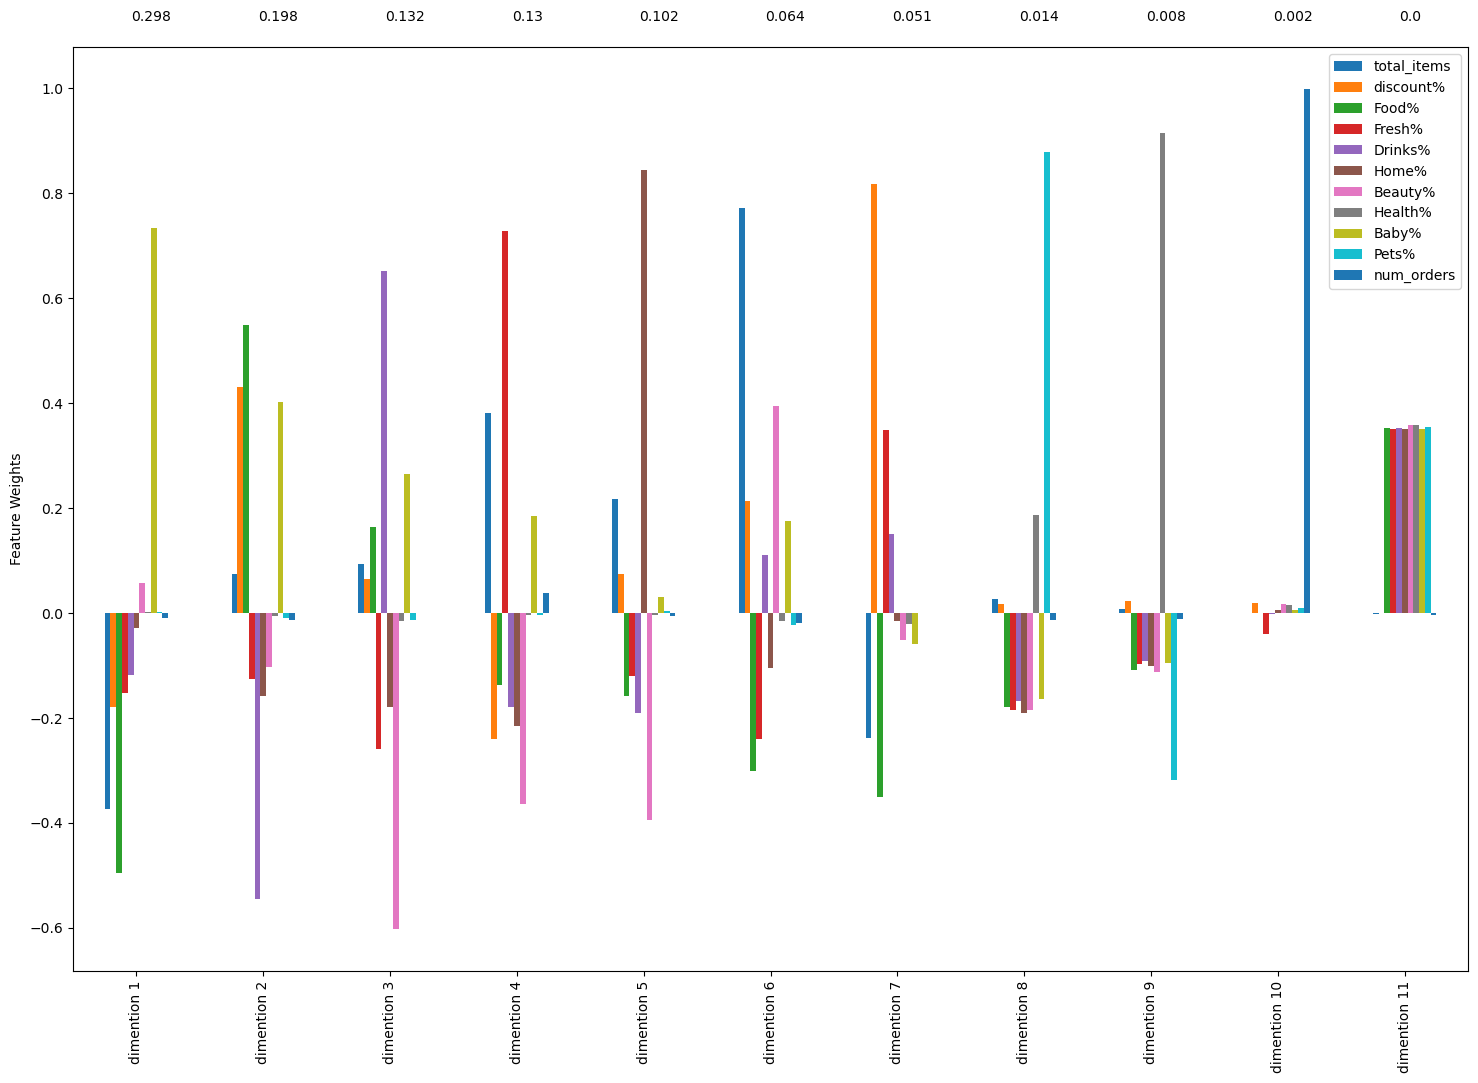

In [44]:
pca_results(pca, df)

In [45]:
def pca_2d_plot(pca, df):
    fig, ax = plt.subplots(figsize=(10,10))
    transformed_data = pca.transform(df.values)
    ax.scatter(transformed_data[:,0], transformed_data[:,1], s=3)
    plt.show()

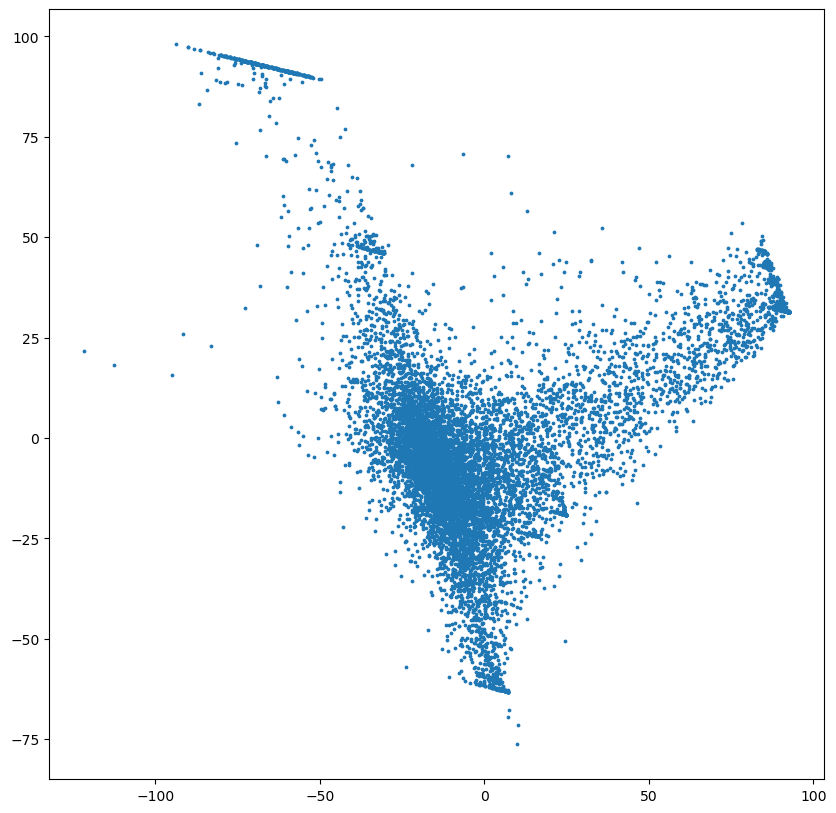

In [46]:
pca_2d_plot(pca, df)

In [47]:
def pca_2d_plot_arrow(pca, df):
    fig, ax = plt.subplots(figsize=(10,10))
    transformed_data = pca.transform(df.values)
    ax.scatter(transformed_data[:,0], transformed_data[:,1], s=3)
    arrow_tail = (ax.get_xlim()[1]/2, ax.get_ylim()[1]/2)
    arrow_head = []
    for i in range(pca.components_.shape[1]):
        arrow_head.append((pca.components_[0,i], pca.components_[1,i]))
    for i in range(pca.components_.shape[1]):
        ax.arrow(arrow_tail[0], arrow_tail[1], arrow_head[i][0], arrow_head[i][1], fc='k', ec='k')
    plt.show()

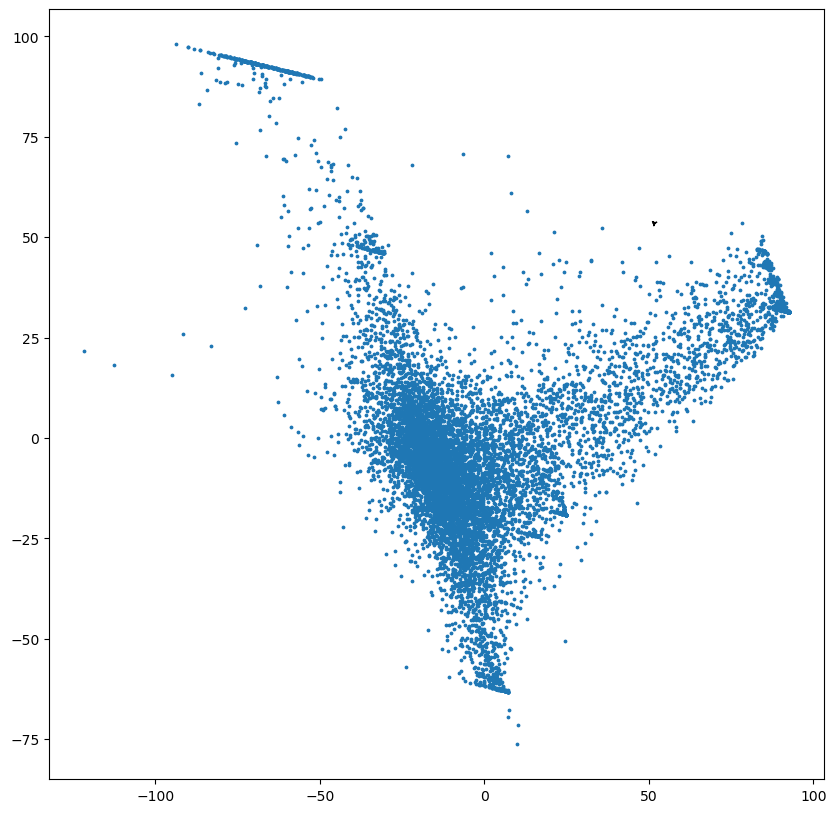

In [48]:
pca_2d_plot_arrow(pca, df)

<Figure size 2000x2000 with 0 Axes>

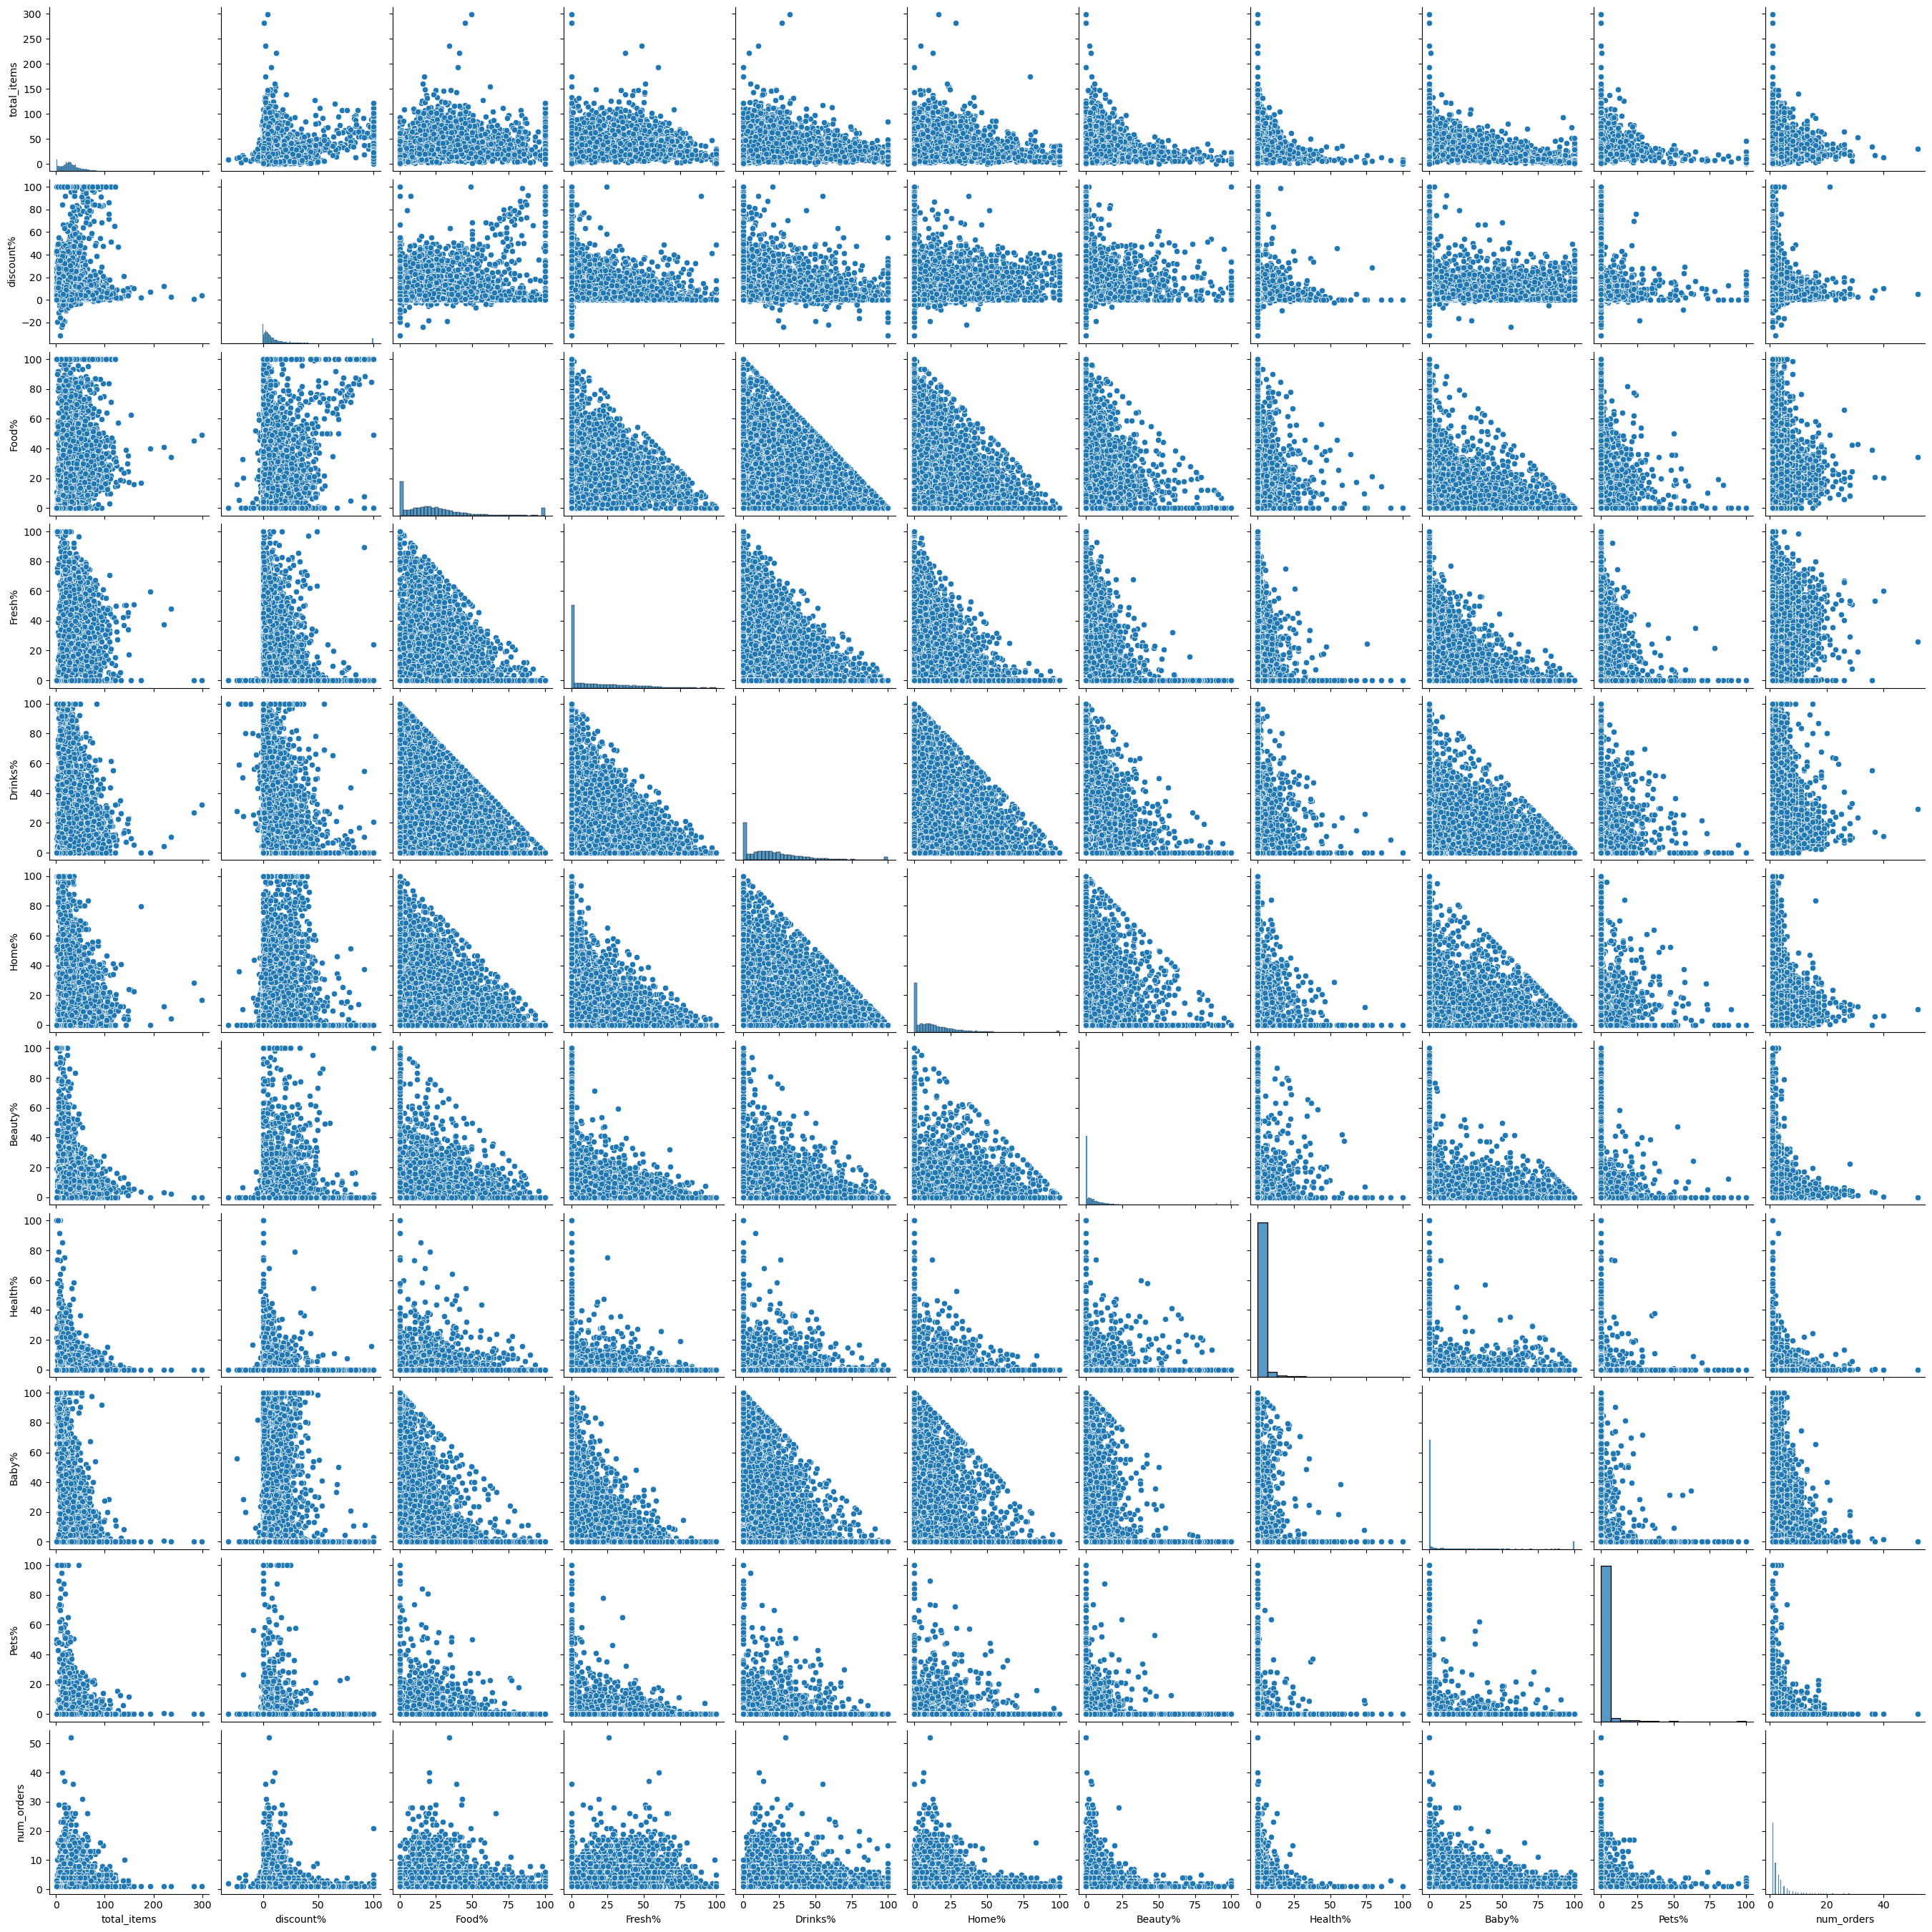

In [49]:
figure = plt.figure(figsize=(20,20))
sns.pairplot(df);
plt.show()

In [50]:
def dependant_variable_detector(df):
    from sklearn.preprocessing import StandardScaler
    from sklearn.linear_model import LinearRegression
    scaler = StandardScaler()
    lr = LinearRegression()
    columns = list(df.columns)
    for col in columns:
        y = scaler.fit_transform(df[col].values.reshape(-1,1))
        X = scaler.fit_transform(df.drop(col, axis=1).values)
        lr.fit(X,y)
        print('Using '+col+' as dependent variable R2 score is :'+str(lr.score(X,y)))

In [51]:
dependant_variable_detector(df)

Using total_items as dependent variable R2 score is :0.2721532836034287
Using discount% as dependent variable R2 score is :0.30395782977173735
Using Food% as dependent variable R2 score is :0.9914935858513226
Using Fresh% as dependent variable R2 score is :0.9868559613586136
Using Drinks% as dependent variable R2 score is :0.9898374751166672
Using Home% as dependent variable R2 score is :0.9852675174491302
Using Beauty% as dependent variable R2 score is :0.9866629058932479
Using Health% as dependent variable R2 score is :0.8483262198492896
Using Baby% as dependent variable R2 score is :0.9936921090049888
Using Pets% as dependent variable R2 score is :0.8985131646915558
Using num_orders as dependent variable R2 score is :0.10669825172834535


In [52]:
def plot_corr_matrix(df):
    df_corr = df.corr()
    fig, ax = plt.subplots(figsize=(12,12))
    cax = ax.matshow(df_corr.values, interpolation='nearest')
    fig.colorbar(cax)
    plt.xticks(range(len(df.columns)), df.columns)
    plt.yticks(range(len(df.columns)), df.columns)

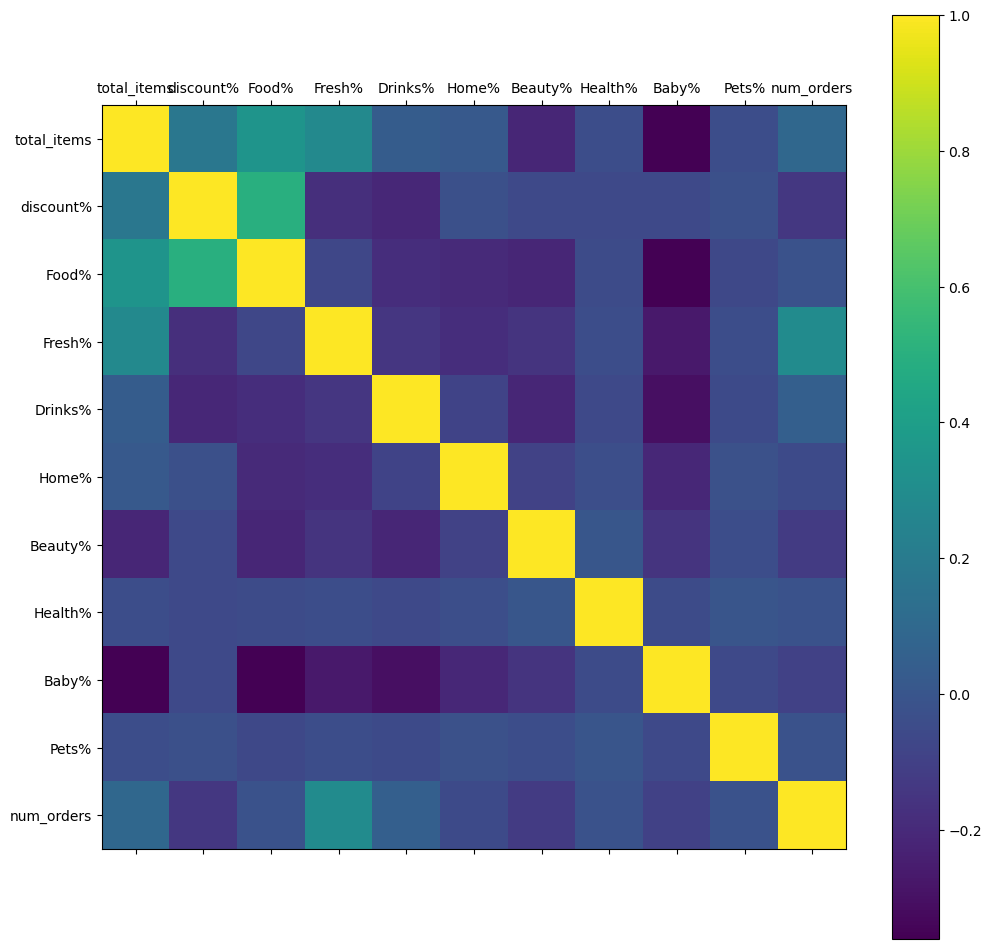

In [53]:
plot_corr_matrix(df)

## Outlier detection

C:\Users\ashis\AppData\Local\Temp\ipykernel_3632\1483742675.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['total_items']);


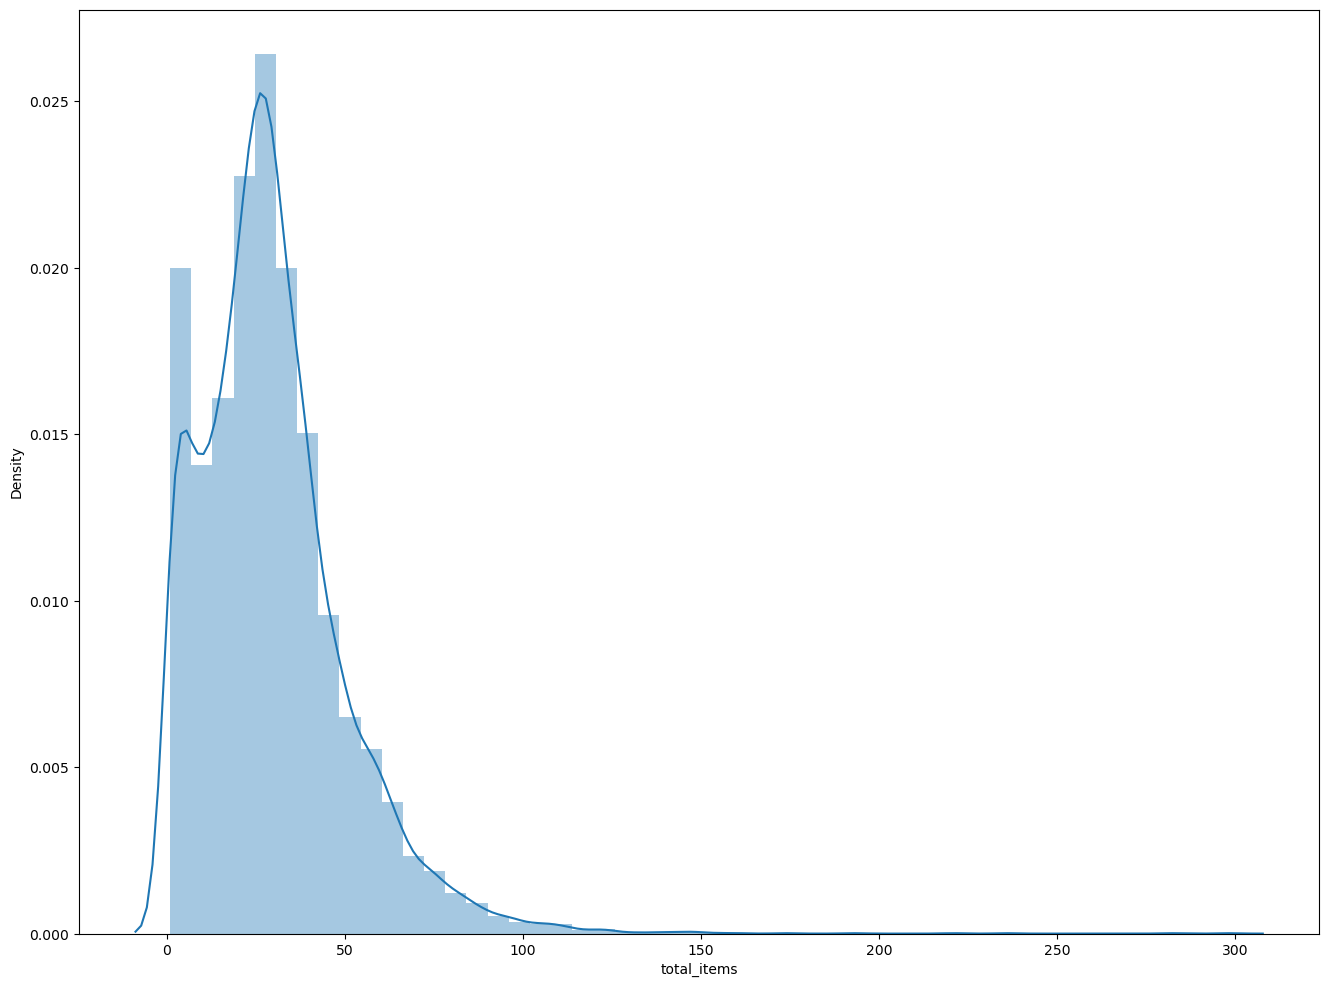

In [55]:
fig = plt.figure(figsize=(16,12))
sns.distplot(df['total_items']);
plt.show()

This distribution definitely has outliers, let's first apply a log transformations

C:\Users\ashis\AppData\Local\Temp\ipykernel_3632\277247732.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['total_items']);


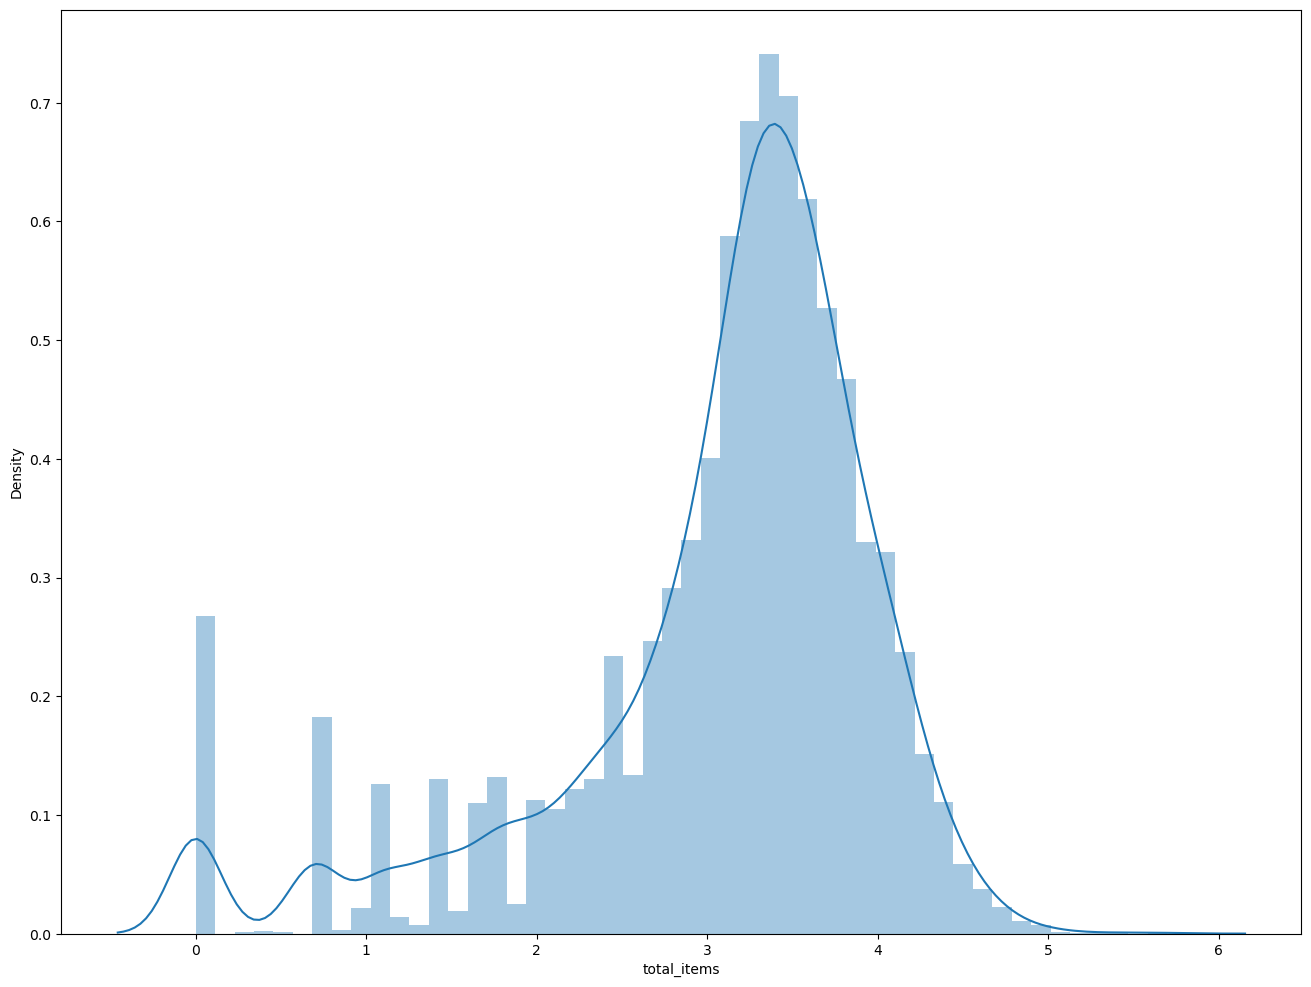

In [57]:
df['total_items'] = np.log(df['total_items'])
fig = plt.figure(figsize=(16,12))
sns.distplot(df['total_items']);
plt.show()

In [58]:
def turkey_outlier_detector(df, cols=None):
    if cols  is None:
        cols = [str(s) for s in df.describe().columns]
        
    q1 = {}
    q3 = {}
    iqd = {}
    r_limit = {}
    l_limit = {}
    outlier_count = {}
    outlier_indices = {}
    for col in cols:
        q1[col] = np.percentile(df[col].values, 25)
        q3[col] = np.percentile(df[col].values, 75)
        iqd[col] = q3[col] - q1[col]
        r_limit[col] = q3[col] + 1.5*iqd[col]
        l_limit[col] = q1[col] - 1.5*iqd[col]
        data_outlier = df[~((df[col]<r_limit[col]).multiply(df[col]>l_limit[col]))]
        outlier_count[col] = data_outlier.shape[0]
        outlier_indices[col] = data_outlier.index
        
    for col in cols:
        print('_'*25)
        print(col+'-'*8+'>'+str(outlier_count[col]))
        
    return outlier_indices

In [59]:
outlier_indices = turkey_outlier_detector(df)

_________________________
total_items-------->885
_________________________
discount%-------->919
_________________________
Food%-------->646
_________________________
Fresh%-------->351
_________________________
Drinks%-------->419
_________________________
Home%-------->517
_________________________
Beauty%-------->945
_________________________
Health%-------->10239
_________________________
Baby%-------->1918
_________________________
Pets%-------->10239
_________________________
num_orders-------->553


In [60]:
df.drop(outlier_indices['total_items'], inplace=True)

In [61]:
frame.drop(outlier_indices['total_items'], inplace=True)

## Are there clusters in the data, how many clusters?

In [63]:
from sklearn.cluster import KMeans

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [65]:
X = scaler.fit_transform(df.values)

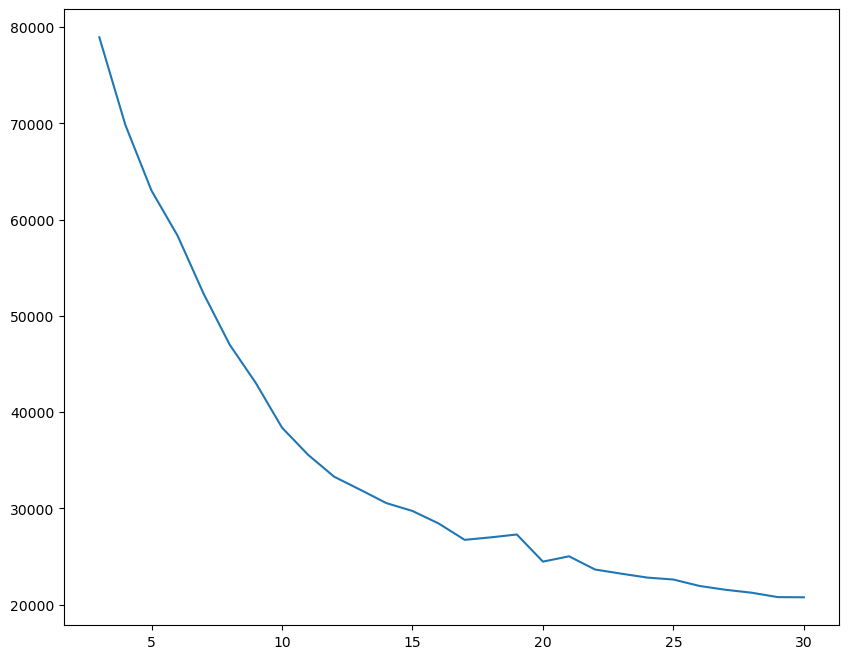

In [66]:
clusters = range(3,31)
inertia = []
for n in clusters:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(clusters, inertia);
plt.show()

In [67]:
def hopkins_statistic(df):
    from sklearn.neighbors import NearestNeighbors
    from sklearn.preprocessing import StandardScaler
    n_samples = df.shape[0]
    num_samples = [int(f*n_samples) for f in [0.25,0.5,0.75]]
    states = [123,42,67,248,654]
    for n in num_samples:
        print('-'*12+str(n)+'-'*12)
        hopkins_statistic = []
        for random_state in states:
            data = df.sample(n=n, random_state=random_state)
            nbrs = NearestNeighbors(n_neighbors=2)
            scaler = StandardScaler()
            X = scaler.fit_transform(data.values)
            nbrs.fit(X)
            sample_dist = nbrs.kneighbors(X)[0][:,1]
            sample_dist = np.sum(sample_dist)
            random_data = np.random.rand(X.shape[0], X.shape[1])
            nbrs.fit(random_data)
            random_dist = nbrs.kneighbors(random_data)[0][:,1]
            random_dist = np.sum(random_dist)
            hs = sample_dist/(sample_dist+random_dist)
            hopkins_statistic.append(hs)
            print('*'*25)
            print('hopkins statistic :'+str(hs))
        print('mean hopkins statistic :'+str(np.mean(np.array(hopkins_statistic))))
        print('hopkins statistic standard deviation :'+str(np.std(np.array(hopkins_statistic))))

In [68]:
hopkins_statistic(df)

------------2338------------
*************************
hopkins statistic :0.5944701711628978
*************************
hopkins statistic :0.5966803184214345
*************************
hopkins statistic :0.5964425377318556
*************************
hopkins statistic :0.5959113435491599
*************************
hopkins statistic :0.5968686368872889
mean hopkins statistic :0.5960746015505273
hopkins statistic standard deviation :0.0008641310225906278
------------4677------------
*************************
hopkins statistic :0.5856871284521118
*************************
hopkins statistic :0.5890834675244973
*************************
hopkins statistic :0.584605055332307
*************************
hopkins statistic :0.5839967836460292
*************************
hopkins statistic :0.5873559625325758
mean hopkins statistic :0.5861456794975043
hopkins statistic standard deviation :0.0018599424064541462
------------7015------------
*************************
hopkins statistic :0.5809805516063135
****

Not a great hopkins statistic score

In [70]:
def kth_nearest_data_point(df, k_max):
    from sklearn.neighbors import NearestNeighbors
    from sklearn.preprocessing import StandardScaler
    ks = range(1,k_max+1)
    scaler = StandardScaler()
    X = scaler.fit_transform(df.values)
    nbrs = NearestNeighbors(n_neighbors=k_max)
    nbrs.fit(X)
    kneighbors_result = nbrs.kneighbors()[0]
    kth_neighbor_dist = list(np.sum(kneighbors_result, axis=0))
    fig, ax = plt.subplots(figsize=(12,12))
    ax.plot(ks, kth_neighbor_dist);
    plt.show()

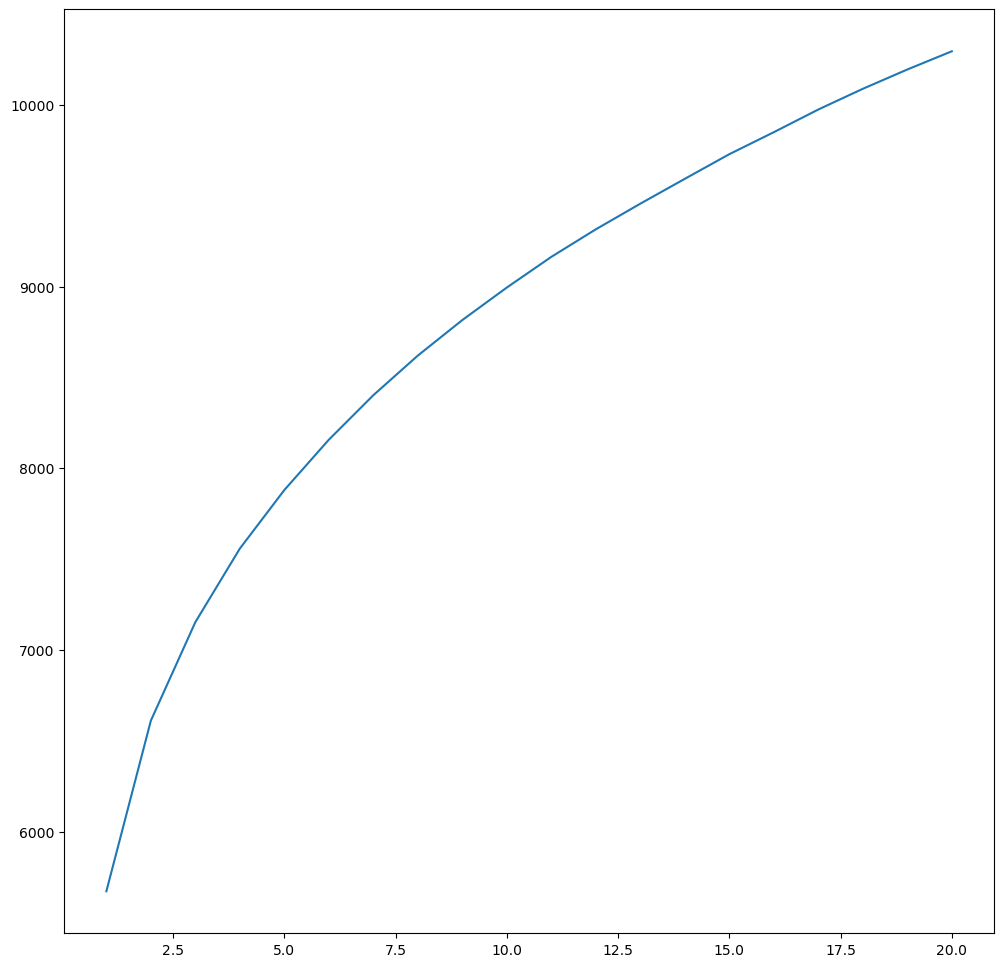

In [71]:
kth_nearest_data_point(df, 20)

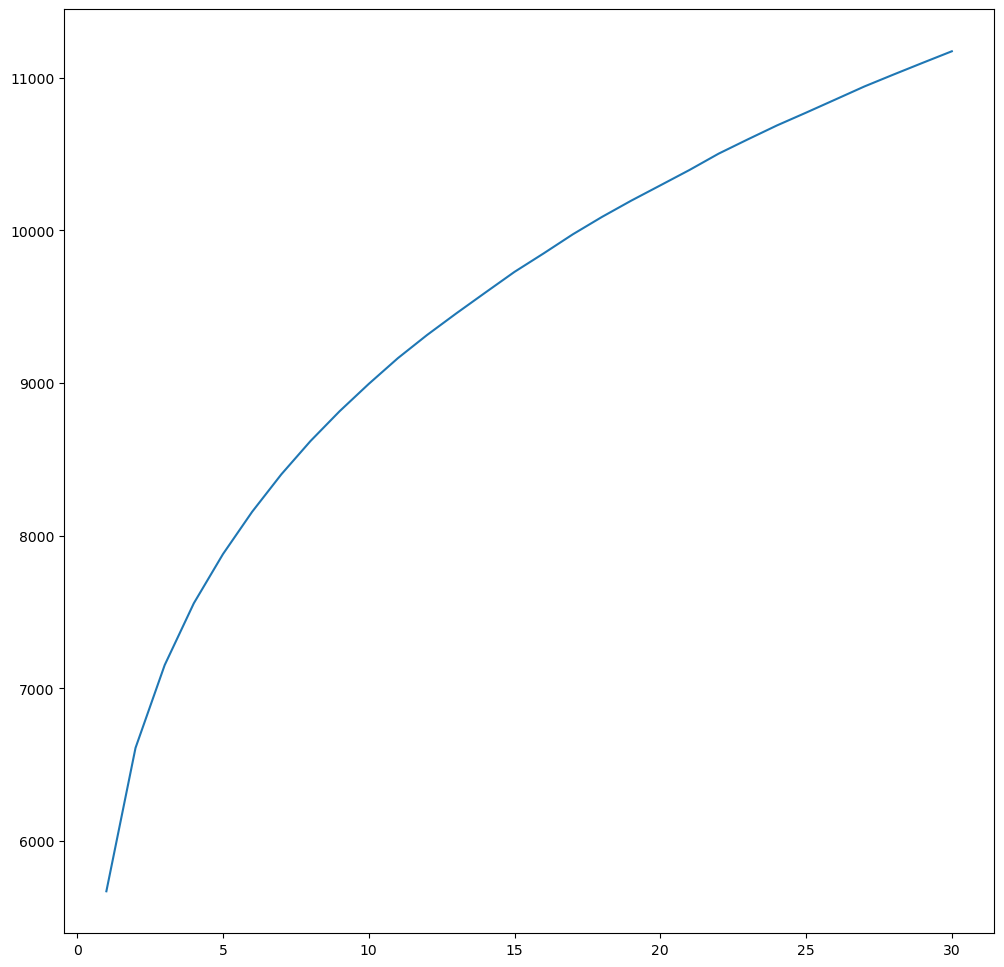

In [72]:
kth_nearest_data_point(df,30)

In [73]:
def plot_silhoutte_score(X, max_clusters=20):
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_score
    num_clusters = range(2,max_clusters+1)
    sil_score = []
    for n in num_clusters:
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X)
        preds = kmeans.predict(X)
        sil_score.append(silhouette_score(X, preds))
        
    fig, ax = plt.subplots(figsize=(12,12))
    ax.plot(num_clusters, sil_score)
    plt.show()

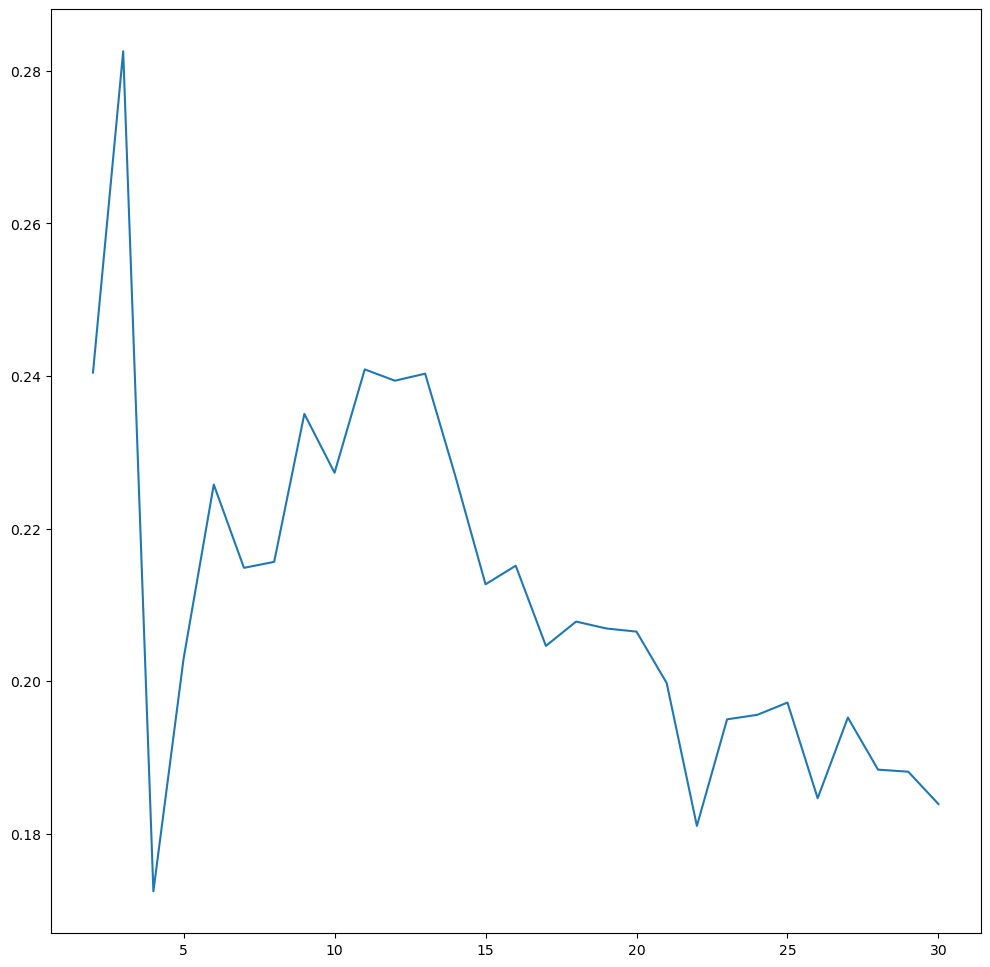

In [74]:
plot_silhoutte_score(X,30)

In [75]:
def ncomponents_of_gmm(X, min_components, max_components):
    from sklearn.mixture import GaussianMixture
    import itertools
    from scipy import linalg
    import matplotlib as mpl
    min_bic = np.inf
    bic = []
    n_components_range = range(min_components, max_components+1)
    cv_types = ['spherical','tied','diag','full']
    for cv_type in cv_types:
        for n_components in n_components_range:
            gmm = GaussianMixture(n_components=n_components, covariance_type=cv_type)
            gmm.fit(X)
            bic.append(gmm.bic(X))
            if bic[-1] < min_bic:
                min_bic = bic[-1]
                best_gmm = gmm
        
    bic = np.array(bic)
    color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
    clf = best_gmm
    bars = []

    # Plot the BIC scores
    spl = plt.subplot(2, 1, 1)
    for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
        xpos = np.array(n_components_range) + .2 * (i - 2)
        bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
    plt.xticks(n_components_range)
    plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
    plt.title('BIC score per model')
    xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
        .2 * np.floor(bic.argmin() / len(n_components_range))
    plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
    spl.set_xlabel('Number of components')
    spl.legend([b[0] for b in bars], cv_types)

    # Plot the winner
    splot = plt.subplot(2, 1, 2)
    Y_ = clf.predict(X)
    for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_,
                                           color_iter)):
        v, w = linalg.eigh(cov)
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan2(w[0][1], w[0][0])
        angle = 180. * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(.5)
        splot.add_artist(ell)

    plt.xticks(())
    plt.yticks(())
    plt.title('Selected GMM: full model, 2 components')
    plt.subplots_adjust(hspace=.35, bottom=.02)
    plt.show()
    return best_gmm

TypeError: Ellipse.__init__() takes 4 positional arguments but 5 were given

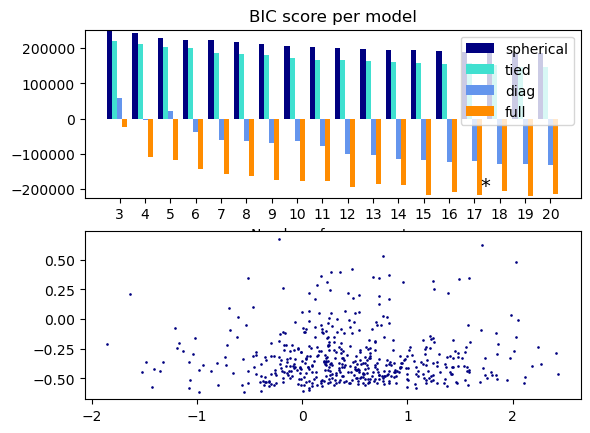

In [76]:
gmm = ncomponents_of_gmm(X, 3, 20)

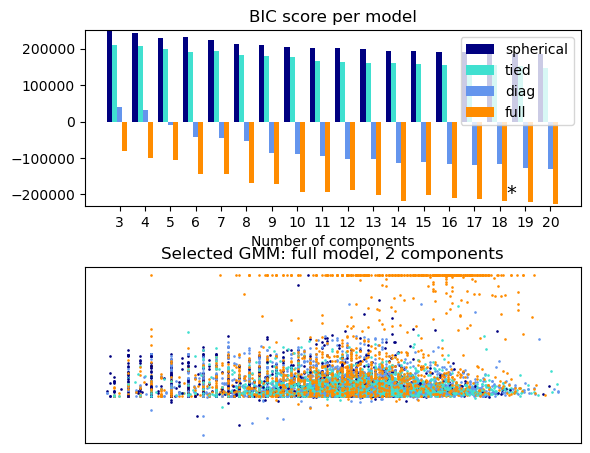

In [125]:
def ncomponents_of_gmm(X, min_components, max_components):
    from sklearn.mixture import GaussianMixture
    import itertools
    from scipy import linalg
    import matplotlib as mpl
    import matplotlib.pyplot as plt
    import numpy as np
    
    min_bic = np.inf
    bic = []
    n_components_range = range(min_components, max_components + 1)
    cv_types = ['spherical', 'tied', 'diag', 'full']
    
    for cv_type in cv_types:
        for n_components in n_components_range:
            gmm = GaussianMixture(n_components=n_components, covariance_type=cv_type)
            gmm.fit(X)
            bic.append(gmm.bic(X))
            if bic[-1] < min_bic:
                min_bic = bic[-1]
                best_gmm = gmm
    
    bic = np.array(bic)
    color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue', 'darkorange'])
    clf = best_gmm
    bars = []

    # Plot the BIC scores
    spl = plt.subplot(2, 1, 1)
    for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
        xpos = np.array(n_components_range) + .2 * (i - 2)
        bars.append(plt.bar(xpos, bic[i * len(n_components_range): (i + 1) * len(n_components_range)],
                            width=.2, color=color))
    plt.xticks(n_components_range)
    plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
    plt.title('BIC score per model')
    xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 + .2 * np.floor(bic.argmin() / len(n_components_range))
    plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
    spl.set_xlabel('Number of components')
    spl.legend([b[0] for b in bars], cv_types)

    # Plot the winner
    splot = plt.subplot(2, 1, 2)
    Y_ = clf.predict(X)
    for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_, color_iter)):
        v, w = linalg.eigh(cov)
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan2(w[0][1], w[0][0])
        angle = 180. * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(xy=mean, width=v[0], height=v[1], angle=180. + angle, color=color, alpha=0.5)
        ell.set_clip_box(splot.bbox)
        splot.add_artist(ell)

    plt.xticks(())
    plt.yticks(())
    plt.title('Selected GMM: full model, 2 components')
    plt.subplots_adjust(hspace=.35, bottom=.02)
    plt.show()
    
    return best_gmm

# Example usage:
gmm = ncomponents_of_gmm(X, 3, 20)


In [127]:
gmm.covariance_type

'full'

In [129]:
gmm.n_components

20

In [131]:
def entropy(df):
    p_df = {}
    for col in df.columns:
        p_df[col] = df[col].value_counts()/len(df[col])
    entropy = sc.stats.entropy(pd.DataFrame(p_df))
    return entropy

In [133]:
entropy(df)

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [135]:
def under_partition_measure(X, k_max):
    from sklearn.cluster import KMeans
    ks = range(1,k_max+1)
    UPM = []
    for k in ks:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        UPM.append(kmeans.inertia_)
    fig, ax = plt.subplots(figsize=(14,14))
    ax.plot(ks, UPM);
    plt.show()
    return UPM

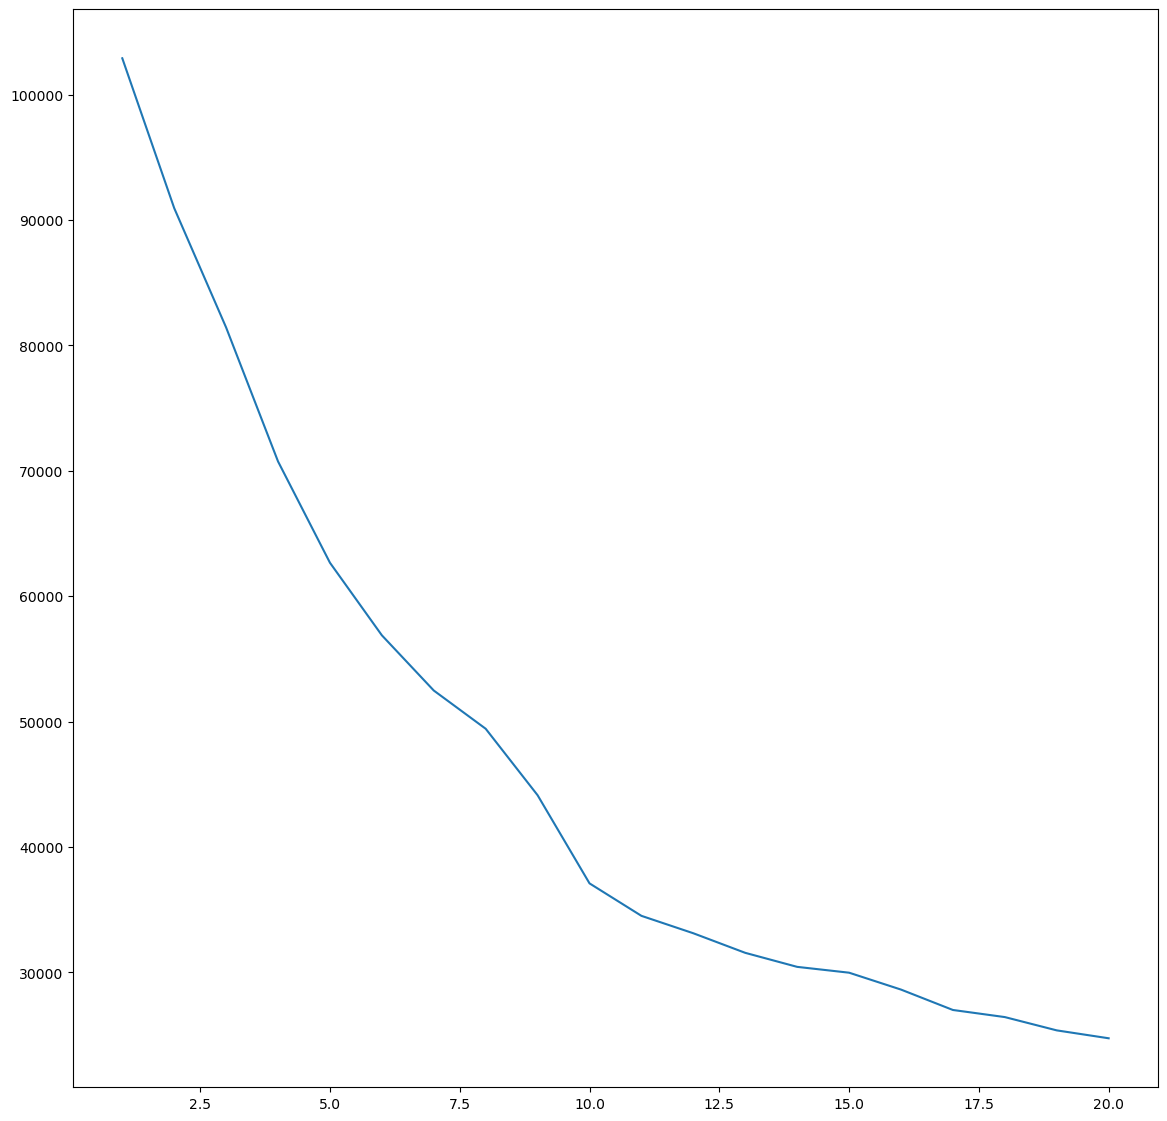

In [137]:
_ = under_partition_measure(X, 20)

In [138]:
def over_partition_measure(X, k_max):
    from sklearn.cluster import KMeans
    from sklearn.metrics.pairwise import  pairwise_distances
    ks = range(1,k_max+1)
    OPM = []
    for k in ks:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        centers = kmeans.cluster_centers_
        d_min = np.inf
        for pair in list(itertools.combinations(centers, 2)):
            d = pairwise_distances(pair[0].reshape(1,-1), pair[1].reshape(1,-1), metric='euclidean')
            if d<d_min:
                d_min = d
        OPM.append(k/d_min)
        
    fig, ax = plt.subplots(figsize=(12,12))
    ax.plot(ks, OPM)
    plt.show()
    return OPM

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (20,) + inhomogeneous part.

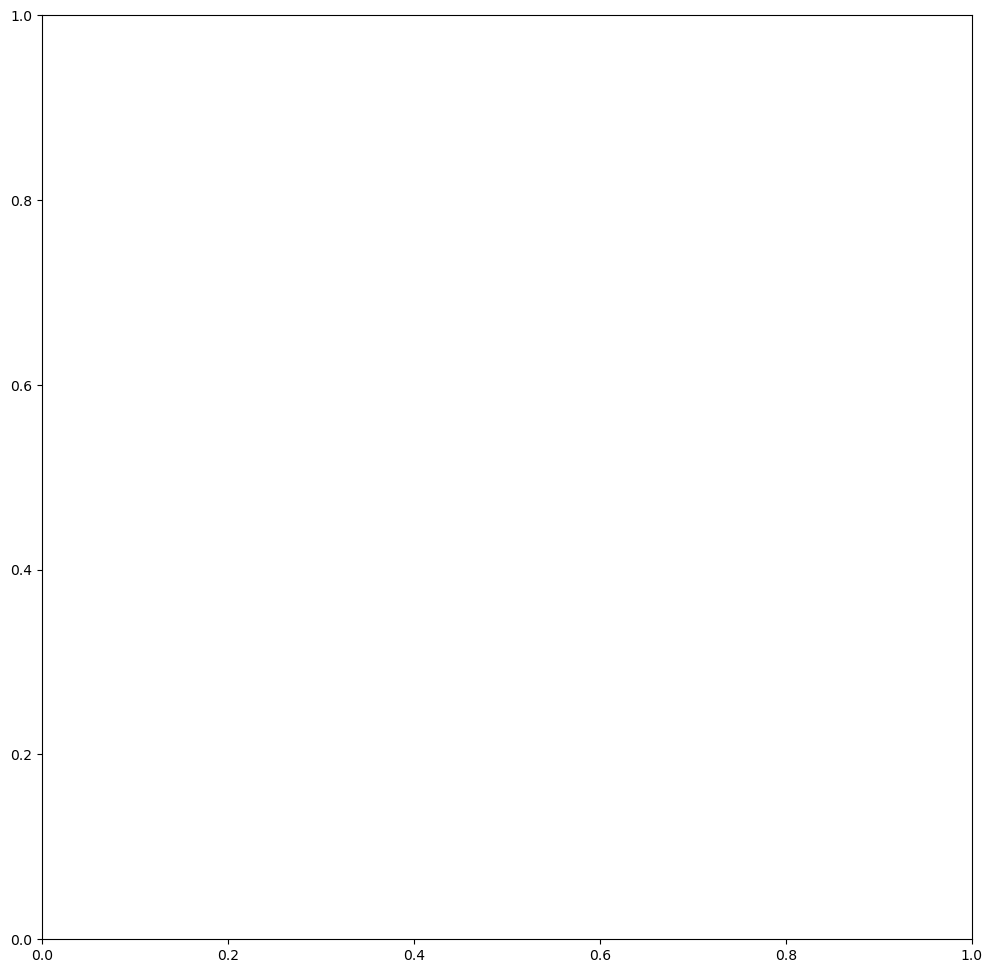

In [141]:
_ = over_partition_measure(X, 20)

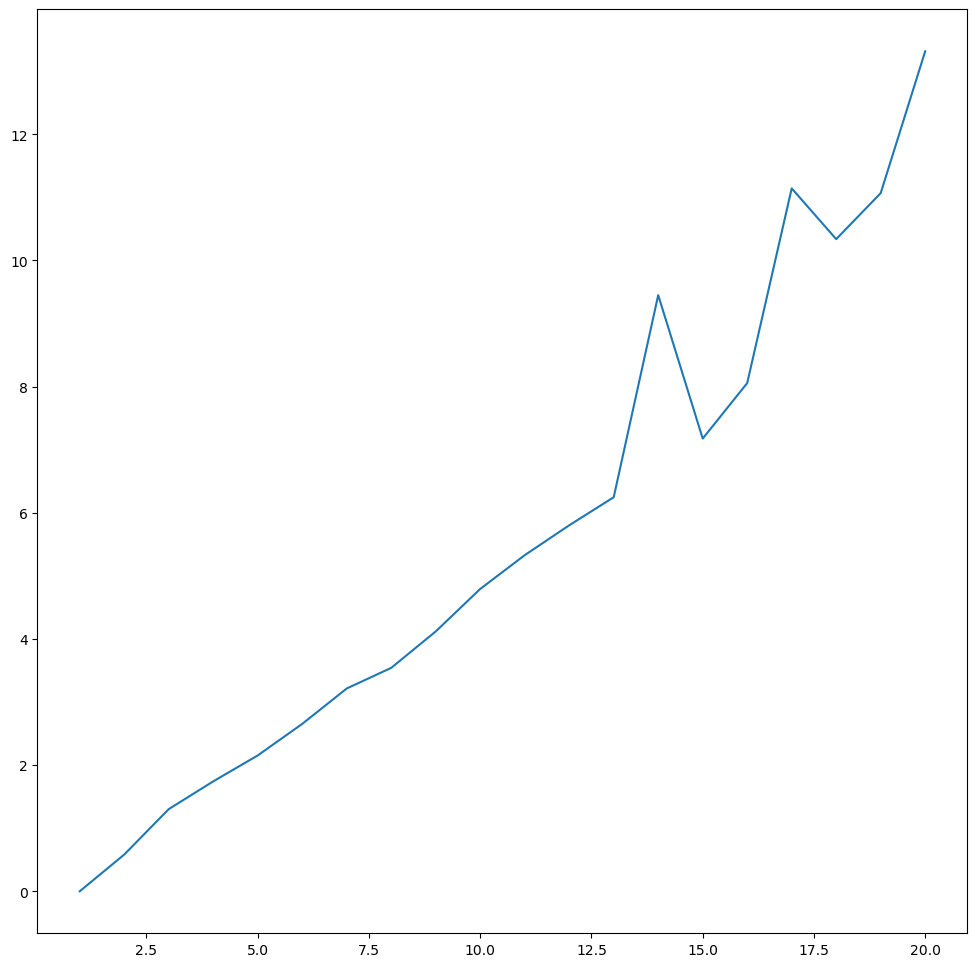

In [145]:
def over_partition_measure(X, k_max):
    from sklearn.cluster import KMeans
    from sklearn.metrics.pairwise import pairwise_distances
    import numpy as np
    import itertools
    ks = range(1, k_max + 1)
    OPM = []
    
    for k in ks:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        centers = kmeans.cluster_centers_
        d_min = np.inf
        for pair in list(itertools.combinations(centers, 2)):
            d = pairwise_distances(pair[0].reshape(1, -1), pair[1].reshape(1, -1), metric='euclidean')[0][0]
            if d < d_min:
                d_min = d
        OPM.append(k / d_min)
        
    fig, ax = plt.subplots(figsize=(12, 12))
    ax.plot(ks, OPM)
    plt.show()
    
    return OPM

# Example usage:
_ = over_partition_measure(X, 20)


In [147]:
def validity_index(X, k_max):
    UPM = under_partition_measure(X, k_max)
    OPM = over_partition_measure(X, k_max)
    UPM_min = np.min(UPM)
    OPM_min = np.min(OPM)
    UPM_max = np.max(UPM)
    OPM_max = np.max(OPM)
    norm_UPM = []
    norm_OPM = []
    for i in range(k_max):
        norm_UPM.append((UPM[i]-UPM_min)/(UPM_max-UPM_min))
        norm_OPM.append((OPM[i]-OPM_min)/(OPM_max-OPM_min))
        
    validity_index = np.array(norm_UPM)+np.array(norm_OPM)
    fig, ax = plt.subplots(figsize=(12,12))
    ax.plot(range(1,k_max+1), validity_index)
    return validity_index

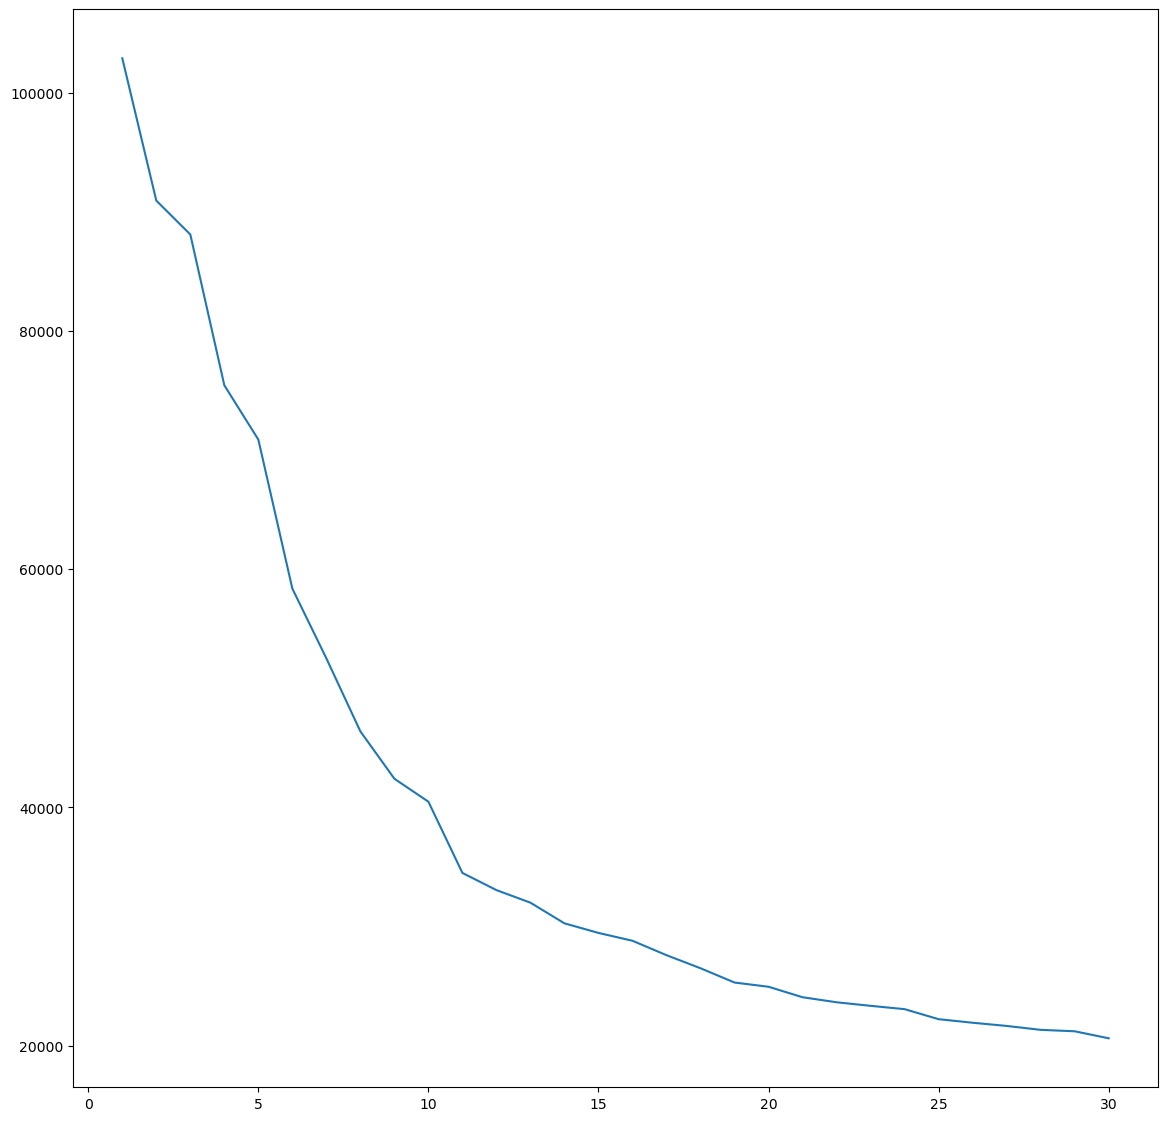

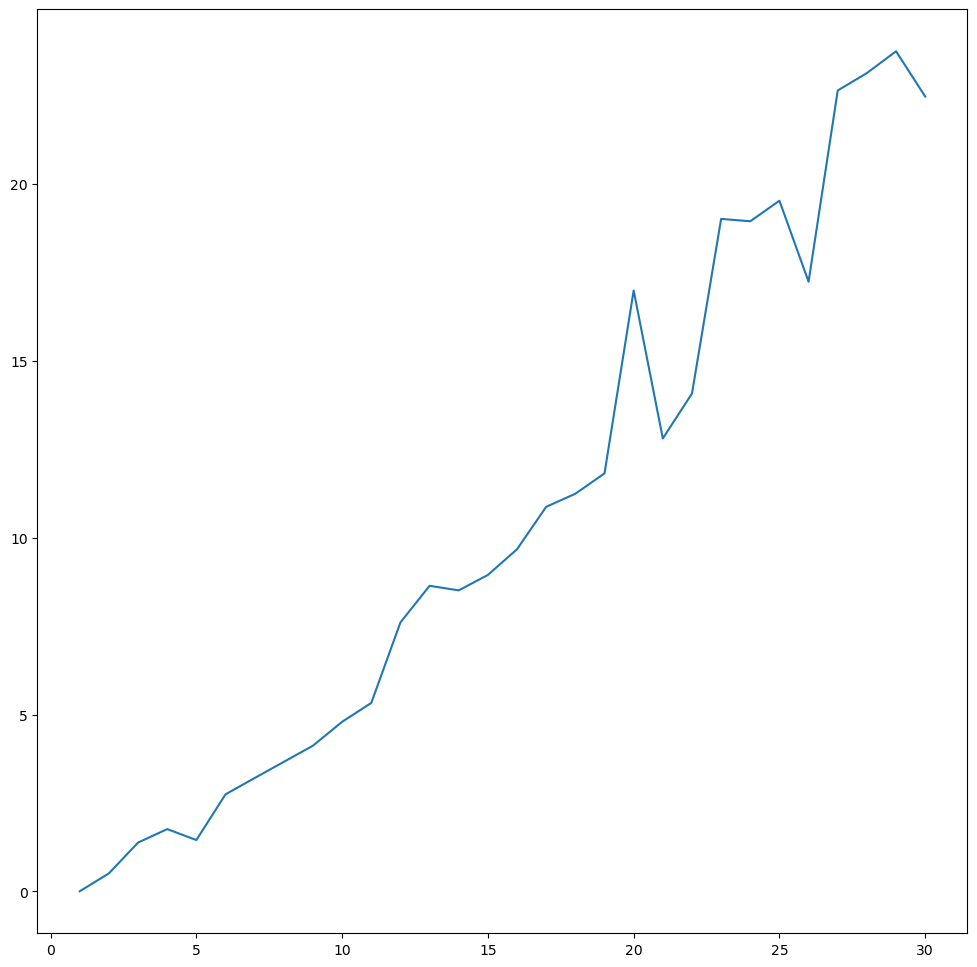

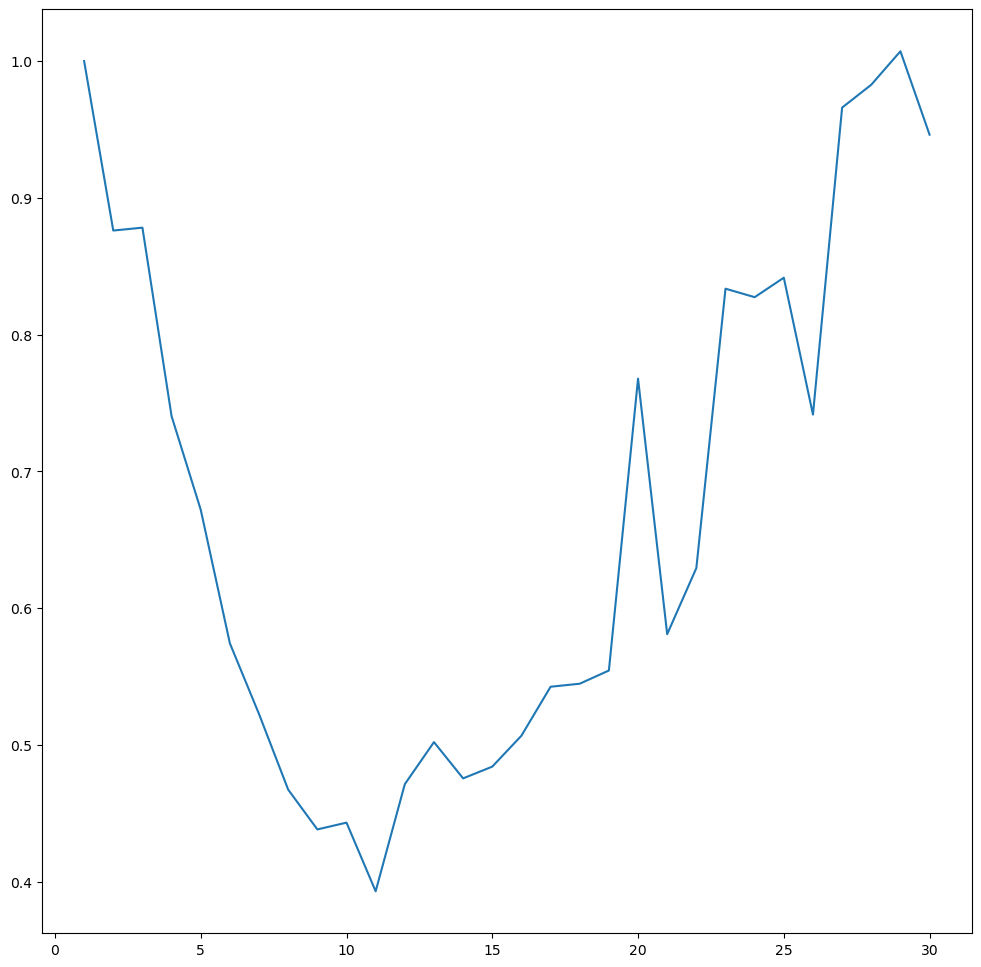

In [149]:
_ = validity_index(X, 30)

All our analysis so far suggests there could be around 10 clusters in the data, let's now manually examine and try to interpret the meaning of these clusters.

### Clustering and Interpretation

In [152]:
k = 10
kmeans_10 = KMeans(n_clusters=10)
kmeans_10.fit(X)
frame['labels'] = kmeans_10.predict(X)

In [153]:
frame[frame['labels']==0]

order  total_items  discount%  weekday  hour   Food%  Fresh%  \
customer                                                                 
100         435        82.25    49.9625        1    21   81.62    0.00   
341        1248         6.00    42.8600        3    10  100.00    0.00   
351        1263        21.00    48.9500        3     9   76.34   15.74   
1370       4256         6.00    50.0000        2    11  100.00    0.00   
1441       4449        22.00   100.0000        4     0  100.00    0.00   
...         ...          ...        ...      ...   ...     ...     ...   
9630      28701        27.00   100.0000        2    19  100.00    0.00   
9635      28709        25.00   100.0000        2    20  100.00    0.00   
9856      29130        15.50   100.0000        2    20  100.00    0.00   
10025     29538       122.00   100.0000        6    20  100.00    0.00   
10129     29769        23.50   100.0000        2    12  100.00    0.00   

          Drinks%  Home%  Beauty%  Health%  Baby%  Pets%  num_orders  labels  
customer                                                                      
100       15.8325   1.06      0.0      0.0   1.05    0.0         4.0       0  
341        0.0000   0.00      0.0      0.0   0.00    0.0         1.0       0  
351        3.9100   4.01      0.0      0.0   0.00    0.0         1.0       0  
1370       0.0000   0.00      0.0      0.0   0.00    0.0         1.0       0  
1441       0.0000   0.00      0.0      0.0   0.00    0.0         1.0       0  
...           ...    ...      ...      ...    ...    ...         ...     ...  
9630       0.0000   0.00      0.0      0.0   0.00    0.0         2.0       0  
9635       0.0000   0.00      0.0      0.0   0.00    0.0         1.0       0  
9856       0.0000   0.00      0.0      0.0   0.00    0.0         2.0       0  
10025      0.0000   0.00      0.0      0.0   0.00    0.0         1.0       0  
10129      0.0000   0.00      0.0      0.0   0.00    0.0         2.0       0  

[387 rows x 15 columns]

In [154]:
frame[frame['labels']==0].describe()

order  total_items   discount%     weekday        hour  \
count    387.000000   387.000000  387.000000  387.000000  387.000000   
mean    9654.496124    51.222007   93.718264    3.782946   15.418605   
std     6163.549363    22.758098   13.955821    2.064860    4.970427   
min      435.000000     6.000000   33.330000    1.000000    0.000000   
25%     5461.500000    32.000000  100.000000    2.000000   12.000000   
50%     7574.000000    52.000000  100.000000    3.000000   16.000000   
75%     9600.500000    66.000000  100.000000    5.500000   20.000000   
max    29769.000000   122.000000  100.000000    7.000000   23.000000   

            Food%      Fresh%     Drinks%       Home%     Beauty%     Health%  \
count  387.000000  387.000000  387.000000  387.000000  387.000000  387.000000   
mean    97.108516    0.337429    0.860879    0.727506    0.328374    0.111906   
std      8.363146    2.156057    3.583508    3.718928    1.817458    1.136040   
min     50.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%    100.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%    100.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%    100.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max    100.000000   24.240000   30.780000   34.410000   16.535000   15.420000   

            Baby%       Pets%  num_orders  labels  
count  387.000000  387.000000  387.000000   387.0  
mean     0.403445    0.120930    1.211886     0.0  
std      3.536679    1.680724    0.530484     0.0  
min      0.000000    0.000000    1.000000     0.0  
25%      0.000000    0.000000    1.000000     0.0  
50%      0.000000    0.000000    1.000000     0.0  
75%      0.000000    0.000000    1.000000     0.0  
max     50.000000   24.080000    5.000000     0.0

-> These are the class of people who buy beauty products a lot, let's call them beauty concious people.<br>
-> Some seem to buy a lot of grocery and home products as well, should be mothers.<br>
-> These class of people seem to have placed very less number of orders, this a valuable point.<br>
-> ulabox can try for marketing strategies to appeal to these mothers.<br>
-> A campaigning event where these women get their hands on ordering from ulabox, for which they get some incentive will be a good idea.<br>
-> This should be held in market or a beauty parlour where these women are most likely to be seen.<br>

In [160]:
frame.loc[frame['labels']==0, 'class'] = 'beauty_concious'

In [162]:
frame[frame['labels']==1]

order  total_items  discount%  weekday  hour      Food%     Fresh%  \
customer                                                                       
38          195    23.666667   0.336667        4    12  17.540000   9.273333   
45          220    19.333333   1.810000        1    14   7.506667   3.810000   
50          248    31.166667  10.475000        7    12  20.966667  16.063333   
57          292    39.000000   5.650000        4    20   6.030000   4.070000   
58          293    17.000000  13.750000        3    14  12.550000   0.000000   
...         ...          ...        ...      ...   ...        ...        ...   
10137     29783    12.000000   0.000000        2    13   0.000000   0.000000   
10164     29837    37.500000  19.350000        3     9  21.365000   0.000000   
10189     29887     8.000000   6.820000        3    16   0.000000   0.000000   
10211     29948    14.500000   0.000000        3    22   0.000000   0.000000   
10237     29997    32.000000   0.000000        4    17   4.625000   0.000000   

             Drinks%      Home%    Beauty%   Health%  Baby%  Pets%  \
customer                                                             
38         56.716667  13.460000   3.010000  0.000000   0.00    0.0   
45         56.563333   8.976667  14.426667  8.713333   0.00    0.0   
50         54.378333   5.233333   2.111667  1.248333   0.00    0.0   
57         49.060000   4.930000   0.000000  0.000000  35.92    0.0   
58         69.470000  17.990000   0.000000  0.000000   0.00    0.0   
...              ...        ...        ...       ...    ...    ...   
10137     100.000000   0.000000   0.000000  0.000000   0.00    0.0   
10164      63.230000  15.405000   0.000000  0.000000   0.00    0.0   
10189     100.000000   0.000000   0.000000  0.000000   0.00    0.0   
10211     100.000000   0.000000   0.000000  0.000000   0.00    0.0   
10237      88.740000   6.635000   0.000000  0.000000   0.00    0.0   

          num_orders  labels class  
customer                            
38               3.0       1   NaN  
45               3.0       1   NaN  
50               6.0       1   NaN  
57               1.0       1   NaN  
58               1.0       1   NaN  
...              ...     ...   ...  
10137            1.0       1   NaN  
10164            2.0       1   NaN  
10189            1.0       1   NaN  
10211            4.0       1   NaN  
10237            2.0       1   NaN  

[1163 rows x 16 columns]

In [164]:
frame[frame['labels']==1].describe()

order  total_items    discount%      weekday         hour  \
count   1163.000000  1163.000000  1163.000000  1163.000000  1163.000000   
mean   15398.397248    23.304306     6.711238     3.570077    15.049011   
std     8943.363197    11.562083     8.322166     2.068333     5.492305   
min      195.000000     4.250000   -31.820000     1.000000     0.000000   
25%     7224.500000    15.250000     1.878750     2.000000    12.000000   
50%    15315.000000    22.000000     4.730000     3.000000    15.000000   
75%    23334.000000    29.000000     8.688939     5.000000    19.500000   
max    29997.000000    89.000000    63.330000     7.000000    23.000000   

             Food%       Fresh%      Drinks%        Home%      Beauty%  \
count  1163.000000  1163.000000  1163.000000  1163.000000  1163.000000   
mean     12.504805     4.106472    67.396159     9.535683     2.916127   
std      11.288975     7.408512    17.994776    10.581560     5.557956   
min       0.000000     0.000000    19.490000     0.000000     0.000000   
25%       1.605000     0.000000    53.071000     0.000000     0.000000   
50%      10.916667     0.000000    62.570000     5.957500     0.000000   
75%      20.172500     5.353333    79.947500    16.546000     3.727917   
max      57.870000    48.710000   100.000000    44.690000    36.820000   

           Health%        Baby%        Pets%   num_orders  labels  
count  1163.000000  1163.000000  1163.000000  1163.000000  1163.0  
mean      0.437247     2.434615     0.438443     2.455718     1.0  
std       1.969940     7.277067     2.389245     1.767577     0.0  
min       0.000000     0.000000     0.000000     1.000000     1.0  
25%       0.000000     0.000000     0.000000     1.000000     1.0  
50%       0.000000     0.000000     0.000000     2.000000     1.0  
75%       0.000000     0.000000     0.000000     3.000000     1.0  
max      17.745000    46.240000    23.360000    15.000000     1.0

-> These are the class of people who buy fresh products a lot.<br>
-> I call them regulars because they seem to buy stuff regularly, their order count percentiles are good.<br>
-> There's another class of customers whose order count is way more good, we will call them loyals, hence the name fresh regulars.<br>
-> People buy fresh products like vegetable, milk etc from a vendor they trust, ulabox has earned the trust of these people.<br>
-> ulabox should try to capitalize on this and convert them into their loyal customers.<br>
-> These people are potential customers who could go into the loyals category in near future.<br>

In [167]:
frame.loc[frame['labels']==1, 'class'] = 'fresh_regulars'

In [169]:
frame[frame['labels']==2]

order  total_items  discount%  weekday  hour    Food%   Fresh%  \
customer                                                                   
63          314         5.50      0.140        1    12   0.0000   0.0000   
65          317         7.50      9.625        7    13   6.2150   0.0000   
96          430        30.50     12.720        2    12  16.6400  26.0050   
101         439        16.00      8.875        5     0   0.0000   5.0850   
105         450         6.00      0.000        6    12   0.0000   0.0000   
...         ...          ...        ...      ...   ...      ...      ...   
10213     29953         8.00     35.100        4     0   0.0000   0.0000   
10217     29960         4.50     11.020        4     9   0.0000   0.0000   
10225     29976         8.00      3.060        4    12   0.0000   0.0000   
10230     29984        20.75      8.925        4    14  13.5425   2.7675   
10233     29993         5.00     28.000        4    16   0.0000   0.0000   

          Drinks%  Home%  Beauty%  Health%   Baby%  Pets%  num_orders  labels  \
customer                                                                        
63         4.7200   0.00   0.0000      0.0   95.28    0.0         2.0       2   
65         9.6100   0.00   0.0000      0.0   84.18    0.0         2.0       2   
96         6.9350   0.00   2.1700      0.0   48.25    0.0         2.0       2   
101       45.2950   0.00   0.0000      0.0   49.62    0.0         2.0       2   
105        0.0000   0.00   0.0000      0.0  100.00    0.0         1.0       2   
...           ...    ...      ...      ...     ...    ...         ...     ...   
10213      0.0000   0.00   0.0000      0.0  100.00    0.0         1.0       2   
10217      0.0000   0.00   0.0000      0.0  100.00    0.0         2.0       2   
10225      0.0000   0.00   0.0000      0.0  100.00    0.0         1.0       2   
10230     15.8025  20.24   2.1925      0.0   45.45    0.0         4.0       2   
10233      0.0000   0.00   0.0000      0.0  100.00    0.0         1.0       2   

         class  
customer        
63         NaN  
65         NaN  
96         NaN  
101        NaN  
105        NaN  
...        ...  
10213      NaN  
10217      NaN  
10225      NaN  
10230      NaN  
10233      NaN  

[992 rows x 16 columns]

In [171]:
frame[frame['labels']==2].describe()

order  total_items   discount%     weekday        hour  \
count    992.000000   992.000000  992.000000  992.000000  992.000000   
mean   15083.631048    14.607754   10.664379    3.719758   14.909274   
std     8733.742750     9.077648   10.386568    2.267680    5.934883   
min      314.000000     4.250000  -23.890000    1.000000    0.000000   
25%     7682.500000     8.000000    2.313750    2.000000   11.000000   
50%    14815.500000    12.100000    7.379286    3.000000   15.000000   
75%    22142.000000    18.750000   17.278750    6.000000   20.000000   
max    29993.000000    93.000000   50.890000    7.000000   23.000000   

            Food%      Fresh%     Drinks%       Home%     Beauty%     Health%  \
count  992.000000  992.000000  992.000000  992.000000  992.000000  992.000000   
mean     5.895224    1.885473    9.001632    7.295049    2.978923    0.789113   
std      8.657442    5.028668   10.744909    9.426482    5.428229    2.727338   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      2.215000    0.000000    5.067500    3.150000    0.000000    0.000000   
75%      8.941875    0.000000   15.060833   11.746250    3.872500    0.000000   
max     63.640000   50.000000   50.970000   44.530000   34.370000   21.260000   

            Baby%       Pets%  num_orders  labels  
count  992.000000  992.000000  992.000000   992.0  
mean    71.482674    0.284664    2.155242     2.0  
std     19.885318    1.929227    1.508835     0.0  
min     19.530000    0.000000    1.000000     2.0  
25%     54.096250    0.000000    1.000000     2.0  
50%     70.760000    0.000000    2.000000     2.0  
75%     89.455000    0.000000    3.000000     2.0  
max    100.000000   28.330000   11.000000     2.0

-> These class of people seem to spend a lot under the home products category, let's call them home decorators.<br>
-> Their order count percentiles are not bad.<br>
-> These also could contain mothers who buy more products and less beauty products.<br>
-> Same strategies as above can be used with them as well.<br>

In [174]:
frame.loc[frame['labels']==2, 'class'] = 'home_decorators'

In [176]:
frame[frame['labels']==3]

order  total_items  discount%  weekday  hour      Food%     Fresh%  \
customer                                                                       
1             3    31.150000  17.849000        1    12  17.762000  52.909000   
3            24    27.782609   4.102174        1    10  23.825652  51.280870   
4            47    17.103448   4.373103        3     9  24.841379  51.082414   
6            77    40.769231   2.683846        2    12  39.315385  23.766923   
8            91    35.250000  23.670000        2    23  24.091250  37.566250   
...         ...          ...        ...      ...   ...        ...        ...   
10033     29567    32.300000   8.904000        4    19  23.656000  37.175000   
10055     29607    27.400000  10.268667        2    11  27.340000  59.024000   
10149     29797    46.125000  18.847500        3    22  12.745000  25.232500   
10199     29907    39.090909   4.608182        3    20  40.006364  40.025455   
10200     29918    31.333333   4.844167        3    20  13.717500  47.800833   

            Drinks%      Home%    Beauty%   Health%      Baby%     Pets%  \
customer                                                                   
1         17.761000   3.207500   2.314500  4.352000   1.695000  0.000000   
3          8.220870  14.773478   0.000000  0.000000   1.898696  0.000000   
4         10.291034  13.035172   0.683793  0.000000   0.065517  0.000000   
6         19.721538   5.633077   2.188462  0.000000   6.617692  2.756923   
8         22.392500  12.033750   3.917500  0.000000   0.000000  0.000000   
...             ...        ...        ...       ...        ...       ...   
10033     10.534000   6.180000   2.636000  0.000000  19.820000  0.000000   
10055      7.967333   1.475333   2.262000  0.000000   1.932667  0.000000   
10149     35.188750  19.182500   6.465000  0.000000   1.182500  0.000000   
10199     10.056364   8.511818   0.328182  0.899091   0.174545  0.000000   
10200     12.057500  15.668333  10.480000  0.273333   0.000000  0.000000   

          num_orders  labels class  
customer                            
1               20.0       3   NaN  
3               23.0       3   NaN  
4               29.0       3   NaN  
6               13.0       3   NaN  
8                8.0       3   NaN  
...              ...     ...   ...  
10033           10.0       3   NaN  
10055           15.0       3   NaN  
10149            8.0       3   NaN  
10199           11.0       3   NaN  
10200           12.0       3   NaN  

[579 rows x 16 columns]

In [178]:
frame[frame['labels']==3].describe()

order  total_items   discount%     weekday        hour  \
count    579.000000   579.000000  579.000000  579.000000  579.000000   
mean   14701.993092    33.580090    6.222272    3.459413   14.851468   
std     8342.537174    14.252590    6.439546    2.264437    5.682674   
min        3.000000     5.724138   -0.055217    1.000000    0.000000   
25%     8275.000000    24.641026    2.582984    1.000000   11.000000   
50%    14751.000000    31.272727    4.709091    3.000000   15.000000   
75%    21959.500000    39.815934    7.523333    6.000000   20.000000   
max    29918.000000   140.600000  100.000000    7.000000   23.000000   

            Food%      Fresh%     Drinks%       Home%     Beauty%     Health%  \
count  579.000000  579.000000  579.000000  579.000000  579.000000  579.000000   
mean    22.811121   33.238899   19.919853   10.675678    3.962487    1.028765   
std     10.078042   18.592830   12.432112    6.854639    3.501936    1.996425   
min      0.842222    0.000000    1.666250    0.000000    0.000000    0.000000   
25%     15.800982   21.048640   11.351667    5.930750    1.563214    0.000000   
50%     21.436923   33.771818   17.169286    9.384286    3.171250    0.117857   
75%     28.505938   46.838154   25.139792   13.941143    5.099000    1.256667   
max     76.439091   80.708000   86.962353   46.759286   26.974444   13.377000   

            Baby%       Pets%  num_orders  labels  
count  579.000000  579.000000  579.000000   579.0  
mean     7.496894    0.781423   12.759931     3.0  
std     11.742252    2.597847    4.719031     0.0  
min      0.000000    0.000000    7.000000     3.0  
25%      0.000000    0.000000   10.000000     3.0  
50%      0.726000    0.000000   12.000000     3.0  
75%     11.054333    0.000000   15.000000     3.0  
max     65.445000   22.751765   52.000000     3.0

-> These class of people have bought lots and lots of grocery at lots and lots of discount.<br>
-> Their order counts are fairly low, considering this they have supposedly ordered grocery only during the offer period.<br>
-> With the given data, considering the order count to be very less, whatever marketing strategy ulabox used has failed to stop churning of customers.<br>
-> Let's call these people grocery shoppers, remember they bought products mostly in discount.

In [181]:
frame.loc[frame['labels']==3, 'class'] = 'grocery_shoppers'

In [183]:
frame[frame['labels']==4]

order  total_items  discount%  weekday  hour  Food%  Fresh%  \
customer                                                                
15          135    25.000000  10.980000        7    14   0.00   12.29   
26          162    25.000000   0.000000        1    18   6.88    0.00   
28          169     8.500000  15.345000        1    21  30.05    0.00   
43          216    25.666667   6.666667        3    15   0.00    0.00   
46          223    26.000000  23.840000        4    19   0.00   13.08   
...         ...          ...        ...      ...   ...    ...     ...   
10190     29888    14.000000  21.280000        3    16  39.20    0.00   
10198     29904    27.000000   6.383333        3    20  14.93    0.00   
10201     29930    31.000000  26.395000        7    23  26.30    0.00   
10207     29938     5.000000   0.000000        3    20   0.00    0.00   
10223     29974    21.000000  27.090000        4    11  33.93    0.00   

            Drinks%       Home%    Beauty%  Health%  Baby%  Pets%  num_orders  \
customer                                                                        
15        25.540000   51.250000   6.730000     4.19    0.0   0.00         1.0   
26        24.650000   43.580000   3.700000     0.00    0.0  21.19         1.0   
28         8.735000   61.215000   0.000000     0.00    0.0   0.00         2.0   
43        25.176667   74.150000   0.673333     0.00    0.0   0.00         3.0   
46        27.600000   35.930000  14.910000     8.48    0.0   0.00         1.0   
...             ...         ...        ...      ...    ...    ...         ...   
10190      0.000000   60.800000   0.000000     0.00    0.0   0.00         1.0   
10198      5.550000   51.043333   1.080000     0.00    0.0  27.40         3.0   
10201     16.320000   44.925000  12.445000     0.00    0.0   0.00         2.0   
10207      0.000000  100.000000   0.000000     0.00    0.0   0.00         1.0   
10223     17.460000   41.460000   7.150000     0.00    0.0   0.00         1.0   

          labels class  
customer                
15             4   NaN  
26             4   NaN  
28             4   NaN  
43             4   NaN  
46             4   NaN  
...          ...   ...  
10190          4   NaN  
10198          4   NaN  
10201          4   NaN  
10207          4   NaN  
10223          4   NaN  

[903 rows x 16 columns]

In [185]:
frame[frame['labels']==4].describe()

order  total_items   discount%     weekday        hour  \
count    903.000000   903.000000  903.000000  903.000000  903.000000   
mean   13441.104097    24.005396   14.843176    3.545958   14.715393   
std     9141.748032    12.803039   11.419433    2.139234    5.844422   
min      135.000000     4.250000   -2.810000    1.000000    0.000000   
25%     5459.000000    15.000000    6.379167    2.000000   11.000000   
50%    12089.000000    22.000000   13.020000    3.000000   15.000000   
75%    21391.000000    29.266667   21.300000    5.000000   20.000000   
max    29974.000000    86.000000   92.100000    7.000000   23.000000   

            Food%      Fresh%     Drinks%       Home%     Beauty%     Health%  \
count  903.000000  903.000000  903.000000  903.000000  903.000000  903.000000   
mean    11.732889    2.767316   14.478487   57.867654    6.753776    0.654909   
std     11.693262    6.538385   13.632447   19.404988    8.806102    2.465873   
min      0.000000    0.000000    0.000000   28.550000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000   43.045000    0.000000    0.000000   
50%      9.150000    0.000000   11.675000   52.450000    2.980000    0.000000   
75%     18.789375    0.631667   24.030000   67.675000   10.947500    0.000000   
max     57.030000   44.830000   55.540000  100.000000   41.780000   16.476667   

            Baby%       Pets%  num_orders  labels  
count  903.000000  903.000000  903.000000   903.0  
mean     4.986360    0.641635    1.678848     4.0  
std     11.310103    3.130688    1.220150     0.0  
min      0.000000    0.000000    1.000000     4.0  
25%      0.000000    0.000000    1.000000     4.0  
50%      0.000000    0.000000    1.000000     4.0  
75%      0.000000    0.000000    2.000000     4.0  
max     55.040000   27.400000   16.000000     4.0

-> These people seem to spend their money in every category, which means they depend on ulabox for all these categories.<br>
-> Their order counts are very impressive, implying that they are the most valuable customers of  ulabox.<br>
-> ulabox should make sure to keep these customers satisfied by giving them coupons and other incentives.<br>
-> ulabox should frame strategies to bring other customers into this category, the strategies which failed and succeeded can be judged by doing some data analytics in the generated data.<br>
-> Let's call them loyals and remember that they are the most valuable customers.<br>
-> In case of a shortage of resource or anything, catering the needs of these customers is a wise thing to do.<br>

In [188]:
frame.loc[frame['labels']==4, 'class'] = 'loyals'

In [190]:
frame[frame['labels']==5]

order  total_items  discount%  weekday  hour       Food%     Fresh%  \
customer                                                                        
2            23    26.000000     2.9700        6    23   24.100000  22.290000   
5            76    21.000000    11.7600        2    23    6.840000   0.000000   
11          113    46.800000    17.4980        1    11   31.646000   5.224000   
14          128    33.285714     3.3600        7    22   40.201429  18.102857   
20          146    48.000000     3.9400        2     9   30.215000  13.690000   
...         ...          ...        ...      ...   ...         ...        ...   
10203     29934    10.000000     0.0000        3    20  100.000000   0.000000   
10206     29937    21.000000    11.4300        3    20   67.340000   0.000000   
10215     29957    21.500000     5.1600        4    15   19.805000  16.625000   
10221     29969    29.250000     2.8225        4    11   90.752500   0.000000   
10231     29988    15.000000     5.2775        4     9   35.662500  16.105000   

            Drinks%      Home%    Beauty%  Health%      Baby%  Pets%  \
customer                                                               
2         38.690000  14.920000   0.000000    0.000   0.000000    0.0   
5         24.020000  26.870000  10.210000    0.000  32.060000    0.0   
11         4.274000  12.878000   5.016000    3.686  36.898000    0.0   
14        12.048571  14.247143  10.541429    0.000   4.855714    0.0   
20        21.270000  20.725000   0.000000    7.990   6.115000    0.0   
...             ...        ...        ...      ...        ...    ...   
10203      0.000000   0.000000   0.000000    0.000   0.000000    0.0   
10206      0.000000  32.660000   0.000000    0.000   0.000000    0.0   
10215     30.185000   6.845000   0.000000    0.000  26.540000    0.0   
10221      9.247500   0.000000   0.000000    0.000   0.000000    0.0   
10231     33.030000  15.200000   0.000000    0.000   0.000000    0.0   

          num_orders  labels class  
customer                            
2                1.0       5   NaN  
5                1.0       5   NaN  
11               5.0       5   NaN  
14               7.0       5   NaN  
20               2.0       5   NaN  
...              ...     ...   ...  
10203            1.0       5   NaN  
10206            1.0       5   NaN  
10215            2.0       5   NaN  
10221            4.0       5   NaN  
10231            4.0       5   NaN  

[3028 rows x 16 columns]

In [192]:
frame[frame['labels']==5].describe()

order  total_items    discount%      weekday         hour  \
count   3028.000000  3028.000000  3028.000000  3028.000000  3028.000000   
mean   15150.999009    37.242390     7.768851     3.693197    15.429987   
std     8905.238826    17.702494     7.920259     2.173813     5.740396   
min       23.000000     4.500000    -6.760000     1.000000     0.000000   
25%     7268.500000    26.000000     2.770000     2.000000    12.000000   
50%    15158.000000    33.333333     5.490000     3.000000    16.000000   
75%    23096.000000    45.333333    10.102500     6.000000    20.000000   
max    29988.000000   133.000000    58.275000     7.000000    23.000000   

             Food%       Fresh%      Drinks%        Home%      Beauty%  \
count  3028.000000  3028.000000  3028.000000  3028.000000  3028.000000   
mean     37.776427     8.594538    24.760915    15.608597     6.246808   
std      21.303277     8.971138    12.757153    10.572396     7.171991   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      22.932917     0.000000    15.807000     7.247500     0.000000   
50%      33.211250     5.833750    24.787500    15.102250     4.133333   
75%      46.915250    16.226250    34.298750    23.302500     9.481250   
max     100.000000    31.320000    61.510000    46.326000    37.500000   

           Health%        Baby%        Pets%  num_orders  labels  
count  3028.000000  3028.000000  3028.000000  3028.00000  3028.0  
mean      1.033051     5.017426     0.799397     2.71103     5.0  
std       2.668272    10.327281     3.179872     1.82467     0.0  
min       0.000000     0.000000     0.000000     1.00000     5.0  
25%       0.000000     0.000000     0.000000     1.00000     5.0  
50%       0.000000     0.000000     0.000000     2.00000     5.0  
75%       0.000000     3.246146     0.000000     4.00000     5.0  
max      18.766667    53.970000    26.385000     9.00000     5.0

-> This class is a very large one, these people buy a lot of drinks.<br>
-> This may be for a party or a personal good time.<br>
-> Adding a greeting or wishes to these orders from the people of ulabox, wishing them a good time may give them a feeling of inclusion and care.<br>
-> They definitely are valuable customers.<br>

In [195]:
frame.loc[frame['labels']==5, 'class'] = 'drink_buyers'

In [197]:
frame[frame['labels']==6]

order  total_items  discount%  weekday  hour      Food%  Fresh%  \
customer                                                                    
10          111    24.500000  11.435000        1    19   7.150000   0.000   
37          192    22.333333  13.663333        3     8   8.296667   0.000   
52          258    10.000000  30.640000        7    21   0.000000   0.000   
119         514    21.000000  16.800000        2    19  22.710000   0.000   
145         590    13.600000   5.162000        2    11  10.792000   0.000   
...         ...          ...        ...      ...   ...        ...     ...   
10177     29862     7.000000   0.000000        5    12   0.000000   0.000   
10185     29880     5.500000  24.250000        3    14  63.955000   1.495   
10195     29899     4.500000  12.500000        3    17   0.000000   0.000   
10205     29936    22.000000  13.430000        3    20  12.040000   0.000   
10227     29978    29.500000  20.235000        4    13   0.000000   0.000   

          Drinks%      Home%     Beauty%    Health%  Baby%   Pets%  \
customer                                                             
10          0.000  38.310000   51.450000   3.085000  0.000   0.000   
37          0.000  45.283333   40.943333   5.476667  0.000   0.000   
52          0.000  56.100000   43.900000   0.000000  0.000   0.000   
119         0.000  33.730000   43.550000   0.000000  0.000   0.000   
145         0.988  28.050000   48.114000   0.000000  0.000  12.054   
...           ...        ...         ...        ...    ...     ...   
10177       0.000   0.000000  100.000000   0.000000  0.000   0.000   
10185       0.000   0.000000   34.550000   0.000000  0.000   0.000   
10195       0.000   0.000000  100.000000   0.000000  0.000   0.000   
10205      47.670   0.000000   40.280000   0.000000  0.000   0.000   
10227       0.000   0.000000   73.315000  22.020000  4.665   0.000   

          num_orders  labels class  
customer                            
10               2.0       6   NaN  
37               3.0       6   NaN  
52               1.0       6   NaN  
119              1.0       6   NaN  
145              5.0       6   NaN  
...              ...     ...   ...  
10177            1.0       6   NaN  
10185            2.0       6   NaN  
10195            2.0       6   NaN  
10205            1.0       6   NaN  
10227            2.0       6   NaN  

[208 rows x 16 columns]

In [199]:
frame[frame['labels']==6].describe()

order  total_items   discount%     weekday        hour  \
count    208.000000   208.000000  208.000000  208.000000  208.000000   
mean   12480.769231    17.091667   13.176865    3.774038   15.423077   
std     9097.138710    10.143223   14.062245    2.215863    5.269899   
min      111.000000     4.500000    0.000000    1.000000    0.000000   
25%     4283.750000     8.000000    0.818750    2.000000   12.000000   
50%     9519.500000    14.500000    8.615000    3.000000   16.000000   
75%    19950.750000    24.000000   20.042500    6.000000   20.000000   
max    29978.000000    54.000000   60.605000    7.000000   23.000000   

            Food%      Fresh%     Drinks%       Home%     Beauty%     Health%  \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     9.439858    2.274179    6.628490   10.662300   66.168133    1.446030   
std     13.104311    6.518065   10.609127   14.425311   23.718031    4.356036   
min      0.000000    0.000000    0.000000    0.000000   32.633333    0.000000   
25%      0.000000    0.000000    0.000000    0.000000   45.345000    0.000000   
50%      2.755000    0.000000    0.000000    0.000000   57.615000    0.000000   
75%     14.866250    0.000000   10.030000   20.287500   94.237500    0.000000   
max     64.320000   37.490000   47.670000   56.100000  100.000000   23.120000   

            Baby%       Pets%  num_orders  labels  
count  208.000000  208.000000  208.000000   208.0  
mean     2.522909    0.452904    1.350962     6.0  
std      9.445190    2.823083    0.826435     0.0  
min      0.000000    0.000000    1.000000     6.0  
25%      0.000000    0.000000    1.000000     6.0  
50%      0.000000    0.000000    1.000000     6.0  
75%      0.000000    0.000000    1.000000     6.0  
max     58.340000   28.030000    6.000000     6.0

-> This is the class of pet lovers, they buy a lot of pet products.<br>
-> This is a very creative area for framing marketing strategies.<br>
-> After collecting some data about the pet they grow, a lot can be done.<br>
-> ulabox can try to give them a cheap incentive that adds more fun to the time they spend with their pets, for example a pet cap, a pet dress, a disc or furr ball to play with the pet etc.<br>
-> ulabox could conduct a competition for the  pets and give some incentives for the winner. The value of the incentives should depend on the pet growing population in the place and the convertion rate they expect.<br>
-> ulabox could go social media and conduct a competition in which, participants post beautiful photos of their pets on on ulabox's page or with a harshtag. This way petlovers who have no idea about ulabox can know about it. Ofcourse again the incentive should be high and resonable corresponding to the convertion rate they expect.<br>
-> This is rather a small class of customers, but remember each pawn is a potential queen.<br>

In [202]:
frame.loc[frame['labels']==6, 'class'] = 'pet_lovers'

In [204]:
frame[frame['labels']==7]

order  total_items  discount%  weekday  hour      Food%  Fresh%  \
customer                                                                    
129         551    12.000000    25.0400        2    20   0.000000     0.0   
141         579    18.000000     5.6800        5    22   0.000000     0.0   
166         655    16.000000    12.6400        3     4   0.000000     0.0   
332        1228    18.000000     0.0000        6    22   0.000000     0.0   
374        1330    15.000000    14.0100        6    11   0.000000     0.0   
...         ...          ...        ...      ...   ...        ...     ...   
10009     29501     7.333333     1.4350        7     0  10.263333     0.0   
10112     29732     9.000000    10.3250        1    22   1.545000     0.0   
10143     29791    11.000000    21.9600        2    16   0.000000     0.0   
10192     29893    26.250000    22.7975        5    19  10.275000     0.0   
10216     29959     5.000000    15.3000        4     9  25.450000     0.0   

            Drinks%   Home%    Beauty%  Health%  Baby%       Pets%  \
customer                                                             
129        0.000000   0.000   0.000000   0.0000    0.0  100.000000   
141       69.845000   0.000   0.000000   0.0000    0.0   30.155000   
166        0.000000   0.000  12.520000   0.0000    0.0   87.480000   
332        0.000000   0.000  47.250000   0.0000    0.0   52.750000   
374       22.240000  32.540   9.440000   0.0000    0.0   35.780000   
...             ...     ...        ...      ...    ...         ...   
10009      0.601667  10.680   4.968333   0.0000    0.0   73.483333   
10112     21.410000   2.755   0.000000   4.6350    0.0   69.655000   
10143      0.000000   0.000   0.000000   0.0000    0.0  100.000000   
10192     19.795000  21.580  15.597500   4.8475    0.0   27.905000   
10216     26.220000   0.000   0.000000   0.0000    0.0   48.330000   

          num_orders  labels class  
customer                            
129              1.0       7   NaN  
141              2.0       7   NaN  
166              1.0       7   NaN  
332              1.0       7   NaN  
374              1.0       7   NaN  
...              ...     ...   ...  
10009            6.0       7   NaN  
10112            2.0       7   NaN  
10143            1.0       7   NaN  
10192            4.0       7   NaN  
10216            1.0       7   NaN  

[89 rows x 16 columns]

In [206]:
frame[frame['labels']==7].describe()

order  total_items  discount%    weekday       hour      Food%  \
count     89.000000    89.000000  89.000000  89.000000  89.000000  89.000000   
mean   14730.494382    18.776779   7.907610   3.651685  14.764045  10.270197   
std     9626.090241     9.611732   8.312383   2.034370   5.680954  12.659428   
min      551.000000     5.000000 -18.060000   1.000000   0.000000   0.000000   
25%     5446.000000    11.000000   1.690000   2.000000  11.000000   0.000000   
50%    14966.000000    18.000000   5.676000   4.000000  15.000000   5.150000   
75%    22725.000000    24.000000  13.430000   5.000000  19.000000  18.150000   
max    29959.000000    54.000000  29.410000   7.000000  23.000000  54.125000   

          Fresh%    Drinks%      Home%    Beauty%    Health%      Baby%  \
count  89.000000  89.000000  89.000000  89.000000  89.000000  89.000000   
mean    3.421393  14.285101  12.894940   4.178522   0.438652   2.323614   
std     7.818794  15.673404  15.017436   8.640903   1.861783   7.262996   
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
50%     0.000000  11.365000   9.390000   0.000000   0.000000   0.000000   
75%     1.575000  22.336667  21.086667   3.776000   0.000000   0.000000   
max    37.610000  69.845000  63.630000  47.250000  10.750000  34.420000   

            Pets%  num_orders  labels  
count   89.000000   89.000000    89.0  
mean    52.187354    1.921348     7.0  
std     24.428151    1.254308     0.0  
min     26.605000    1.000000     7.0  
25%     31.874000    1.000000     7.0  
50%     42.460000    1.000000     7.0  
75%     65.035000    2.000000     7.0  
max    100.000000    6.000000     7.0

-> This is again a very great category to work on.<br>
-> Their order count is fairly good too.<br>
-> After collecting some data about the baby, a lot of things can be done.<br>
-> Sending a gift hamper from ulabox on the baby's bday, may send a message to the customers that, ulabox genuinely cares.<br>
-> Conducting a baby beauty peagent and giving incentives for winners, will let the other parents know about ulabox.<br>
-> In these events setting up campaigns where people can make a purchase in ulabox and get a small incentive for it is a good strategy.<br>
-> People don't stay in this class for a long time, this is a valuable point when developing strategies.<br>


In [209]:
frame.loc[frame['labels']==7, 'class'] = 'new_parents'

In [211]:
frame[frame['labels']==8]

order  total_items  discount%  weekday  hour    Food%     Fresh%  \
customer                                                                     
0             0    44.666667    14.1100        4    13  14.0700  73.203333   
7            90    40.000000     0.9300        1    20  23.7000  52.540000   
13          127    32.000000     0.0000        1     9   0.0000  76.950000   
16          136    16.000000    14.0000        5    13   0.0000  51.120000   
17          137    53.000000    18.1000        1    15  11.6500  37.460000   
...         ...          ...        ...      ...   ...      ...        ...   
10219     29963    26.500000     0.8600        5    10   0.0000  79.660000   
10220     29965    14.500000     3.0075        4    11   8.5575  56.340000   
10222     29973    20.000000     3.9500        1     8  17.5100  59.080000   
10224     29975    27.000000     0.0000        4    12  38.0900  56.940000   
10228     29980    29.000000    30.4000        1    23  21.7750  44.055000   

            Drinks%   Home%    Beauty%  Health%    Baby%  Pets%  num_orders  \
customer                                                                      
0          4.356667   6.200   2.176667     0.00   0.0000   0.00         3.0   
7         13.930000   0.000   9.830000     0.00   0.0000   0.00         1.0   
13         0.000000   0.000   8.280000     0.00  14.7700   0.00         1.0   
16        28.300000  20.580   0.000000     0.00   0.0000   0.00         1.0   
17        12.650000   0.000   0.000000     0.00  38.2400   0.00         1.0   
...             ...     ...        ...      ...      ...    ...         ...   
10219      8.365000   2.245   9.730000     0.00   0.0000   0.00         2.0   
10220      0.000000   0.000   0.000000     0.00  35.1025   0.00         4.0   
10222      6.710000   0.000  10.390000     0.00   0.0000   6.31         1.0   
10224      4.960000   0.000   0.000000     0.00   0.0000   0.00         1.0   
10228     14.410000   7.680   5.755000     6.33   0.0000   0.00         2.0   

          labels class  
customer                
0              8   NaN  
7              8   NaN  
13             8   NaN  
16             8   NaN  
17             8   NaN  
...          ...   ...  
10219          8   NaN  
10220          8   NaN  
10222          8   NaN  
10224          8   NaN  
10228          8   NaN  

[1873 rows x 16 columns]

In [213]:
frame[frame['labels']==8].describe()

order  total_items    discount%      weekday         hour  \
count   1873.000000  1873.000000  1873.000000  1873.000000  1873.000000   
mean   16993.639082    40.726963     6.149440     3.688201    15.665243   
std     8341.962728    19.197751     6.863955     2.230556     5.777993   
min        0.000000     5.000000     0.000000     1.000000     0.000000   
25%    10940.000000    28.000000     2.123333     2.000000    12.000000   
50%    17762.000000    37.000000     4.110000     3.000000    17.000000   
75%    24214.000000    49.500000     7.530000     6.000000    21.000000   
max    29980.000000   147.500000    92.000000     7.000000    23.000000   

             Food%       Fresh%      Drinks%        Home%      Beauty%  \
count  1873.000000  1873.000000  1873.000000  1873.000000  1873.000000   
mean     21.660739    45.762436    16.037746     8.634626     4.054531   
std      10.451170    14.801768     9.953039     7.466434     4.940509   
min       0.000000    20.635000     0.000000     0.000000     0.000000   
25%      14.365000    34.150000     8.740000     2.860000     0.000000   
50%      21.055000    43.168000    14.855000     7.253333     2.513750   
75%      28.330000    53.615000    21.870000    12.743333     6.030000   
max      60.340000   100.000000    49.970000    47.368333    32.800000   

           Health%        Baby%        Pets%   num_orders  labels  
count  1873.000000  1873.000000  1873.000000  1873.000000  1873.0  
mean      0.786613     2.229270     0.775482     2.994661     8.0  
std       2.171633     6.434908     2.775611     2.005061     0.0  
min       0.000000     0.000000     0.000000     1.000000     8.0  
25%       0.000000     0.000000     0.000000     1.000000     8.0  
50%       0.000000     0.000000     0.000000     2.000000     8.0  
75%       0.000000     0.000000     0.000000     4.000000     8.0  
max      18.980000    48.360000    23.170000     9.000000     8.0

-> These are again very valuable customers of ulabox.<br>
-> They buy from all the categories and their order counts are pretty impressive.<br>
-> Their order counts are not as impressive as the loyal customers, but these are potential customers who has a chance of becoming loyal customers.<br>

In [216]:
frame.loc[frame['labels']==8, 'class'] = 'grocery_regulars'

In [218]:
frame[frame['labels']==9]

order  total_items  discount%  weekday  hour      Food%  Fresh%  \
customer                                                                    
34          186         27.0      25.95        1    12  22.270000     0.0   
90          417         16.0       4.02        7    15  12.060000     0.0   
103         442         33.0       0.26        1    19  61.610000     0.0   
127         549         33.0       4.41        2    15  42.060000     0.0   
156         620         27.0       1.69        1    15  11.320000     0.0   
...         ...          ...        ...      ...   ...        ...     ...   
9696      28823         11.0      28.25        2    13  26.130000     0.0   
9763      28946         21.0      33.76        7    15  19.450000     0.0   
9937      29312         21.5       4.21        7    20   6.355000     0.0   
9948      29344         20.0       1.66        7    18  55.573333     0.0   
9964      29389         24.0      42.97        5    16  25.930000     0.0   

          Drinks%      Home%    Beauty%    Health%  Baby%  Pets%  num_orders  \
customer                                                                       
34          51.86   6.150000   0.000000  19.720000    0.0   0.00         1.0   
90          39.13   5.050000  19.550000  24.200000    0.0   0.00         1.0   
103          4.44   5.845000   5.925000  20.480000    0.0   1.70         2.0   
127         12.22  18.740000   5.250000  21.740000    0.0   0.00         1.0   
156          0.00  37.450000  24.560000  26.670000    0.0   0.00         1.0   
...           ...        ...        ...        ...    ...    ...         ...   
9696         0.00  34.030000  18.170000  21.670000    0.0   0.00         1.0   
9763        23.45   8.480000  10.220000  38.400000    0.0   0.00         1.0   
9937        32.20  16.865000  17.010000  27.570000    0.0   0.00         2.0   
9948         7.65   3.153333  11.596667  22.033333    0.0   0.00         3.0   
9964         9.83  19.860000   5.880000  24.370000    0.0  14.14         1.0   

          labels class  
customer                
34             9   NaN  
90             9   NaN  
103            9   NaN  
127            9   NaN  
156            9   NaN  
...          ...   ...  
9696           9   NaN  
9763           9   NaN  
9937           9   NaN  
9948           9   NaN  
9964           9   NaN  

[132 rows x 16 columns]

In [220]:
frame[frame['labels']==9].describe()

order  total_items   discount%     weekday        hour  \
count    132.000000   132.000000  132.000000  132.000000  132.000000   
mean   12685.689394    20.650884    5.856258    3.787879   15.098485   
std     9162.427429    10.406621    8.991886    2.193085    5.629611   
min      186.000000     5.000000   -2.520000    1.000000    0.000000   
25%     5061.250000    12.000000    0.143333    2.000000   12.000000   
50%    11542.500000    20.333333    2.865000    4.000000   15.000000   
75%    19618.000000    27.000000    6.662500    6.000000   20.000000   
max    29389.000000    61.000000   45.670000    7.000000   23.000000   

            Food%      Fresh%     Drinks%       Home%     Beauty%     Health%  \
count  132.000000  132.000000  132.000000  132.000000  132.000000  132.000000   
mean    19.190720    6.798968   14.700125    9.908879   10.589891   34.180452   
std     16.733531   12.432527   15.811288   11.656712   14.698494   17.889076   
min      0.000000    0.000000    0.000000    0.000000    0.000000   17.350000   
25%      6.558750    0.000000    0.000000    0.000000    0.000000   22.080833   
50%     15.975000    0.000000    9.890000    5.612500    5.235000   27.720000   
75%     26.450000    7.761250   24.737500   17.306250   16.987500   37.845000   
max     77.690000   61.720000   54.340000   45.140000   65.470000  100.000000   

            Baby%       Pets%  num_orders  labels  
count  132.000000  132.000000  132.000000   132.0  
mean     2.951301    1.679361    1.689394     9.0  
std     10.719938    5.787214    1.870350     0.0  
min      0.000000    0.000000    1.000000     9.0  
25%      0.000000    0.000000    1.000000     9.0  
50%      0.000000    0.000000    1.000000     9.0  
75%      0.000000    0.000000    1.250000     9.0  
max     71.000000   36.980000   15.000000     9.0

-> These are customers who buy a lot of health products, they seem to buy a good amount of drinks, grocery, home and beauty products.<br>
-> The fact that they buy other categories in a good amount makes them valuable customers.<br>
-> Concentrating on these people ulabox can conduct some health based campaigns like a marathon, health awareness programme.<br>
-> But their order counts are very low and their population is pretty low as well. Hence it is best to stick to cheap marketing strategies.

In [223]:
frame.loc[frame['labels']==9, 'class'] = 'health_concious'

That was nicely interpretablle

In [226]:
def pca_2d_plot_labels(pca, df, frame):
    plt.figure(figsize=(18,18));
    transformed_data = pca.transform(df.values)
    data = pd.DataFrame({'dim1':transformed_data[:,0], 'dim2':transformed_data[:,1], 'labels':frame['class'].values})
    sns.lmplot(x='dim1',y='dim2',hue='labels',data=data, fit_reg=False, size=16);
    data1 = pd.DataFrame({'dim2':transformed_data[:,1], 'dim3':transformed_data[:,2], 'labels':frame['class'].values})
    sns.lmplot(x='dim2',y='dim3',hue='labels',data=data1, fit_reg=False, size=16);
    plt.show()

In [228]:
pca_2d_plot_labels(pca, df, frame)

TypeError: lmplot() got an unexpected keyword argument 'size'

<Figure size 1800x1800 with 0 Axes>

In [230]:
def pca_2d_plot_labels(pca, df, frame):
    plt.figure(figsize=(18, 18))
    transformed_data = pca.transform(df.values)
    data = pd.DataFrame({'dim1': transformed_data[:, 0], 'dim2': transformed_data[:, 1], 'labels': frame['class'].values})
    sns.lmplot(x='dim1', y='dim2', hue='labels', data=data, fit_reg=False, height=16)
    data1 = pd.DataFrame({'dim2': transformed_data[:, 1], 'dim3': transformed_data[:, 2], 'labels': frame['class'].values})
    sns.lmplot(x='dim2', y='dim3', hue='labels', data=data1, fit_reg=False, height=16)
    plt.show()

In [232]:
frame.to_csv('customer_segmentation.csv')

In [234]:
frame = pd.read_csv('customer_segmentation.csv')

In [236]:
frame.groupby('class')['num_orders'].describe()

count       mean       std  min   25%   50%    75%   max
class                                                                      
beauty_concious    387.0   1.211886  0.530484  1.0   1.0   1.0   1.00   5.0
drink_buyers      3028.0   2.711030  1.824670  1.0   1.0   2.0   4.00   9.0
fresh_regulars    1163.0   2.455718  1.767577  1.0   1.0   2.0   3.00  15.0
grocery_regulars  1873.0   2.994661  2.005061  1.0   1.0   2.0   4.00   9.0
grocery_shoppers   579.0  12.759931  4.719031  7.0  10.0  12.0  15.00  52.0
health_concious    132.0   1.689394  1.870350  1.0   1.0   1.0   1.25  15.0
home_decorators    992.0   2.155242  1.508835  1.0   1.0   2.0   3.00  11.0
loyals             903.0   1.678848  1.220150  1.0   1.0   1.0   2.00  16.0
new_parents         89.0   1.921348  1.254308  1.0   1.0   1.0   2.00   6.0
pet_lovers         208.0   1.350962  0.826435  1.0   1.0   1.0   1.00   6.0

-> Note that in the loyals class the minimum number of orders itself is 7.<br>
-> Regulars, drink_buyers and new_parents have pretty impressive order counts as well.

In [239]:
frame.groupby('class')['num_orders'].mean().sort_values(ascending=False)

class
grocery_shoppers    12.759931
grocery_regulars     2.994661
drink_buyers         2.711030
fresh_regulars       2.455718
home_decorators      2.155242
new_parents          1.921348
health_concious      1.689394
loyals               1.678848
pet_lovers           1.350962
beauty_concious      1.211886
Name: num_orders, dtype: float64

-> The grocery shoppers being at the lowest for mean number of orders again supports the hypothesis that the people who bought on discount churned.